<a href="https://colab.research.google.com/github/IsfaquethedataAnalyst/Dataanalysis/blob/main/Walmart_store_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

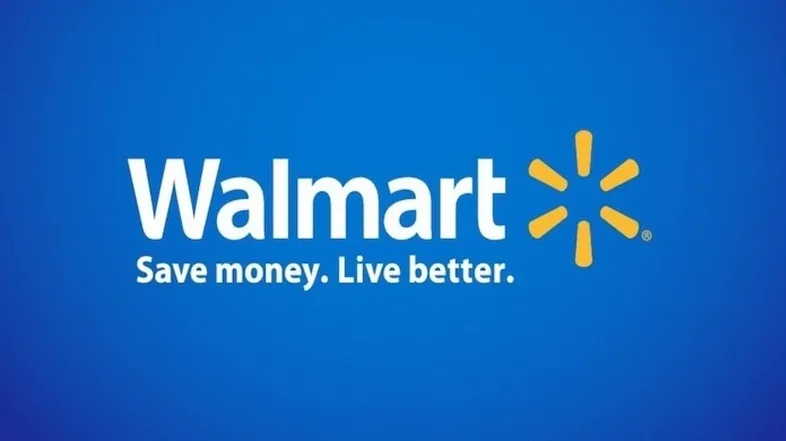

Walmart is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery items from the United States, headquartered in Bentonville, Arkansas. Walmart is the world’s largest company by revenue, with US$ 548.743 billion, according to the Fortune Global 500 list in 2020.

Table of content

2.Business problem

3.Mapping Business Problem to Machine Learning Problem

4.Performance metric to be used

5.Why only this Performance metric?

6.Exploratory Data Analysis(EDA)

7.Data Preprocessing

8.Baseline model without any feature engineering

9.Feature Engineering

10.Feature Importance using Random Forest

11.Baseline model after Feature Engineering

12.Time series model for forecasting i.e Facebook Prophet

13.Various Machine Learning Models

14.Final Model
Deployment
References
Future Work
EndNote

In [5]:
# importing variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore')

In [6]:
# display the visualization in good quality of image
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [7]:
import pandas as pd
features = pd.read_csv('features.csv')
store = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [8]:
data = train.merge(features,on=['Store','Date','IsHoliday'],how = 'inner')
final = data.merge(store,on=['Store'],how='inner')

In [9]:
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [10]:
final.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [11]:
np.sort(final.Dept.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

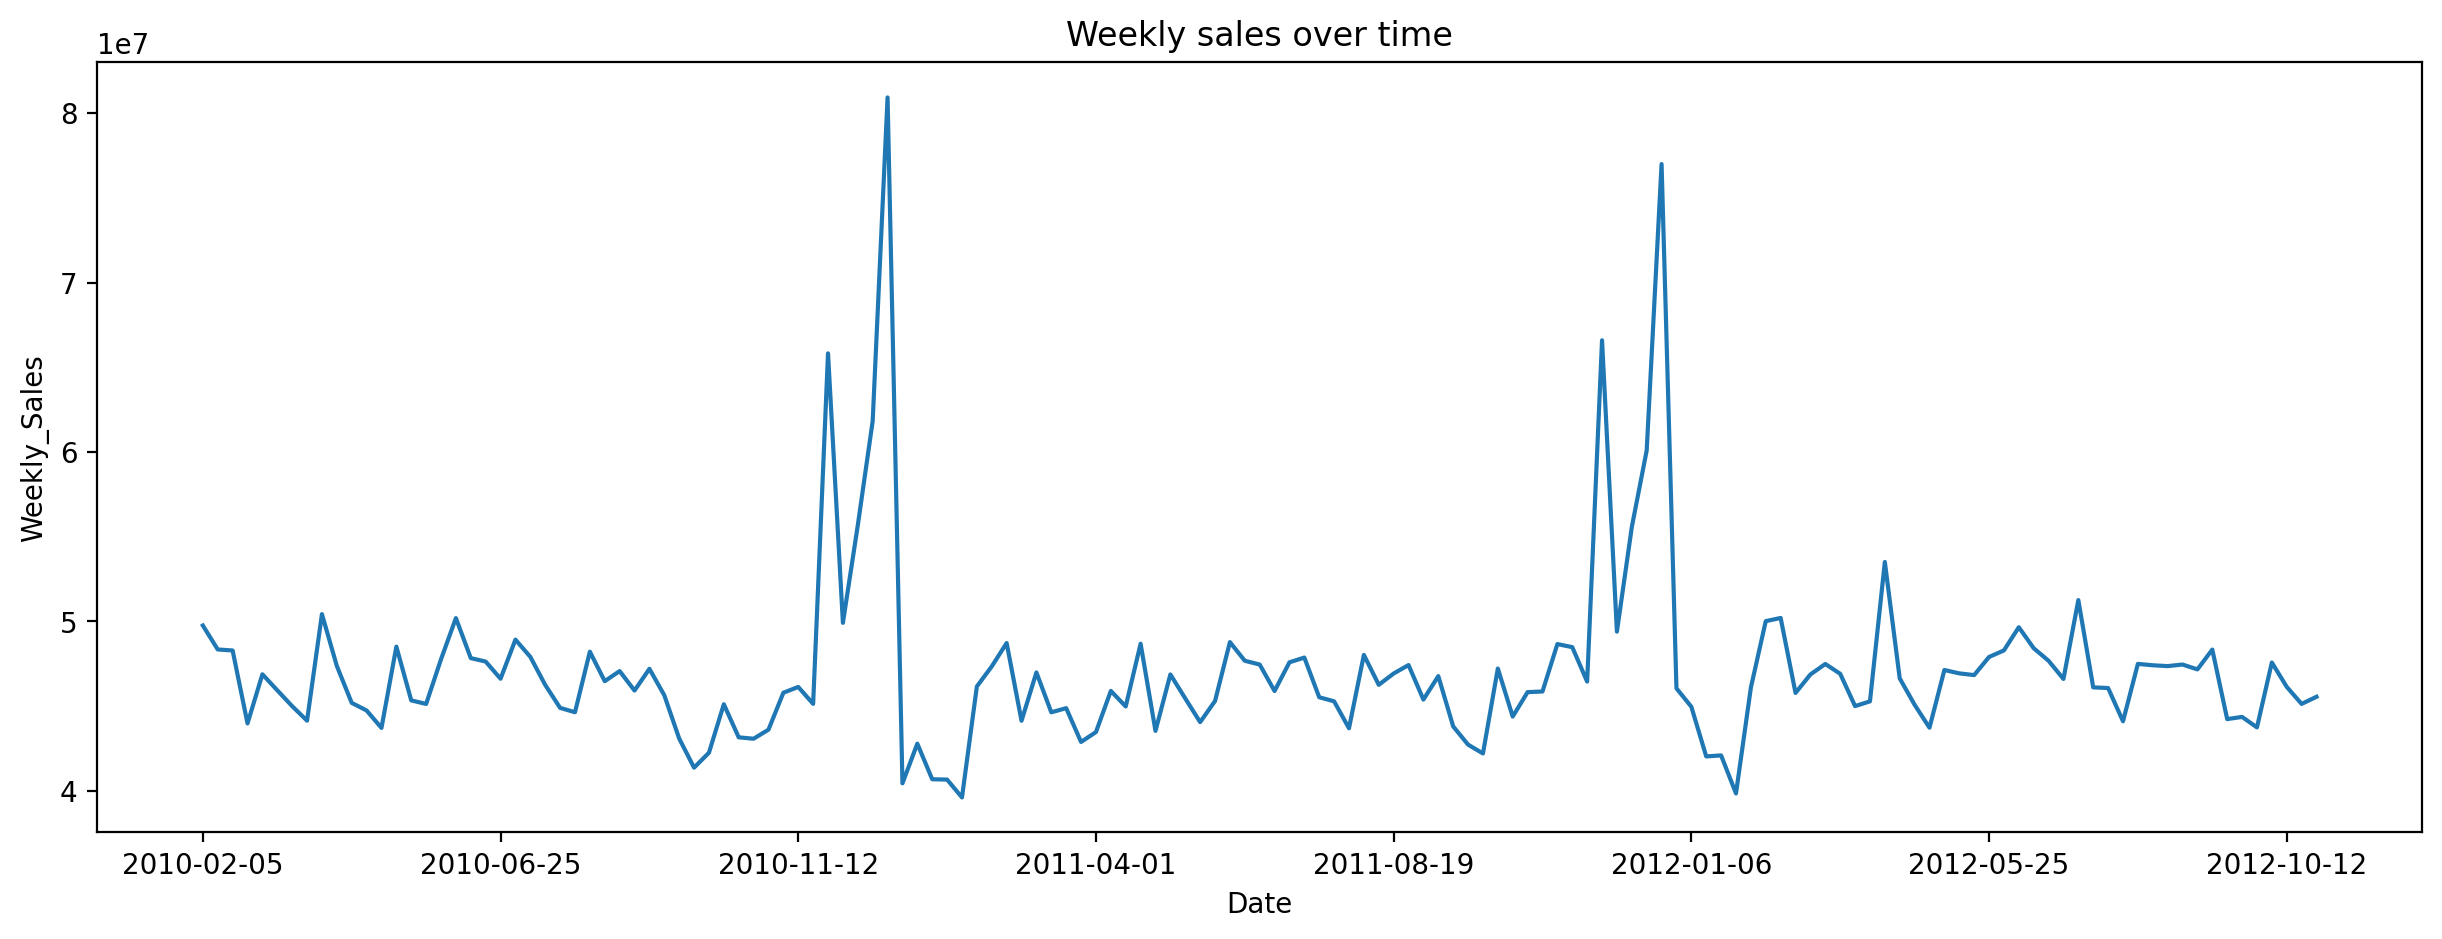

In [12]:
# create a Univariate analysis on Weekly sales column : — →plotting it over date

final.groupby(['Date'])['Weekly_Sales'].sum().plot(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Weekly sales over time')
plt.show()


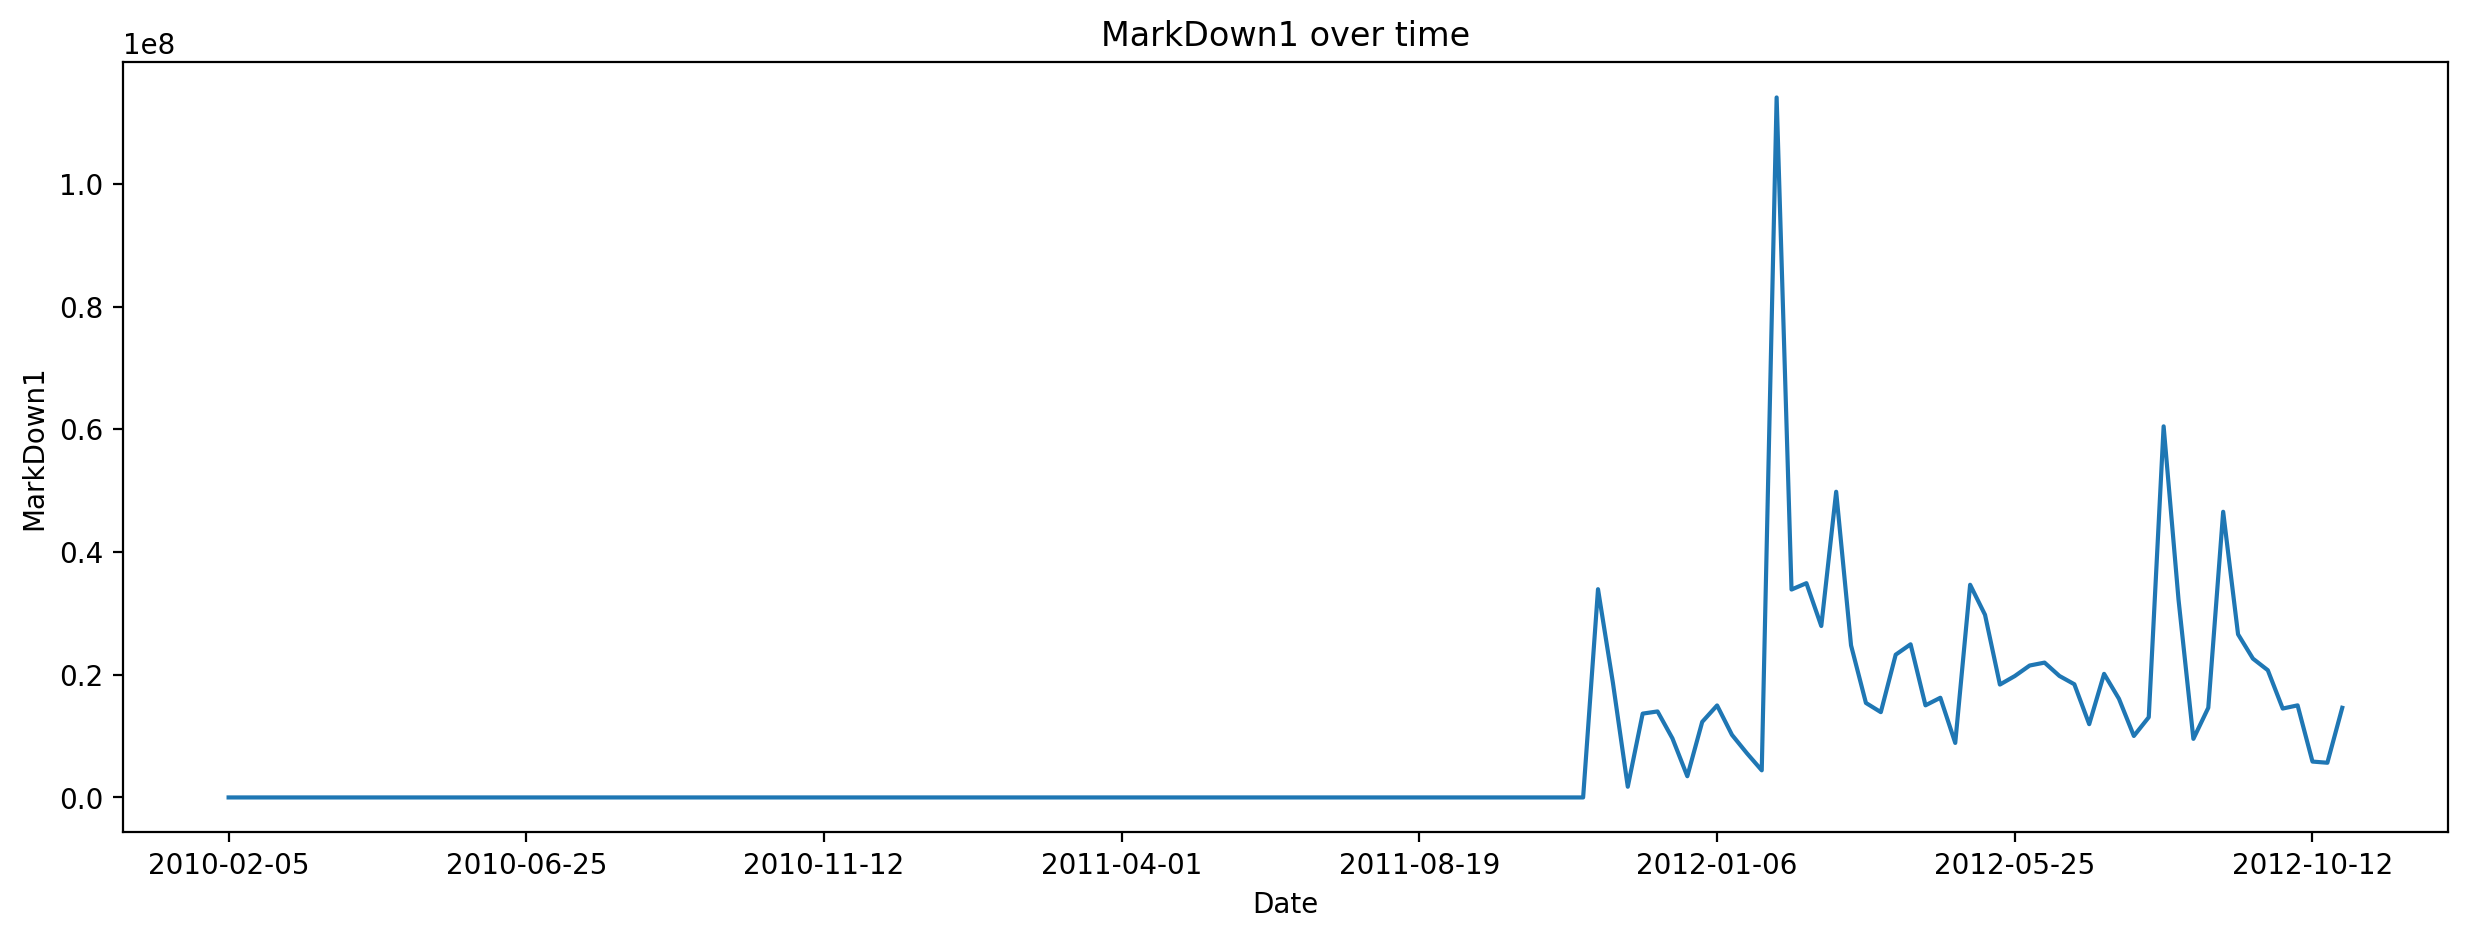

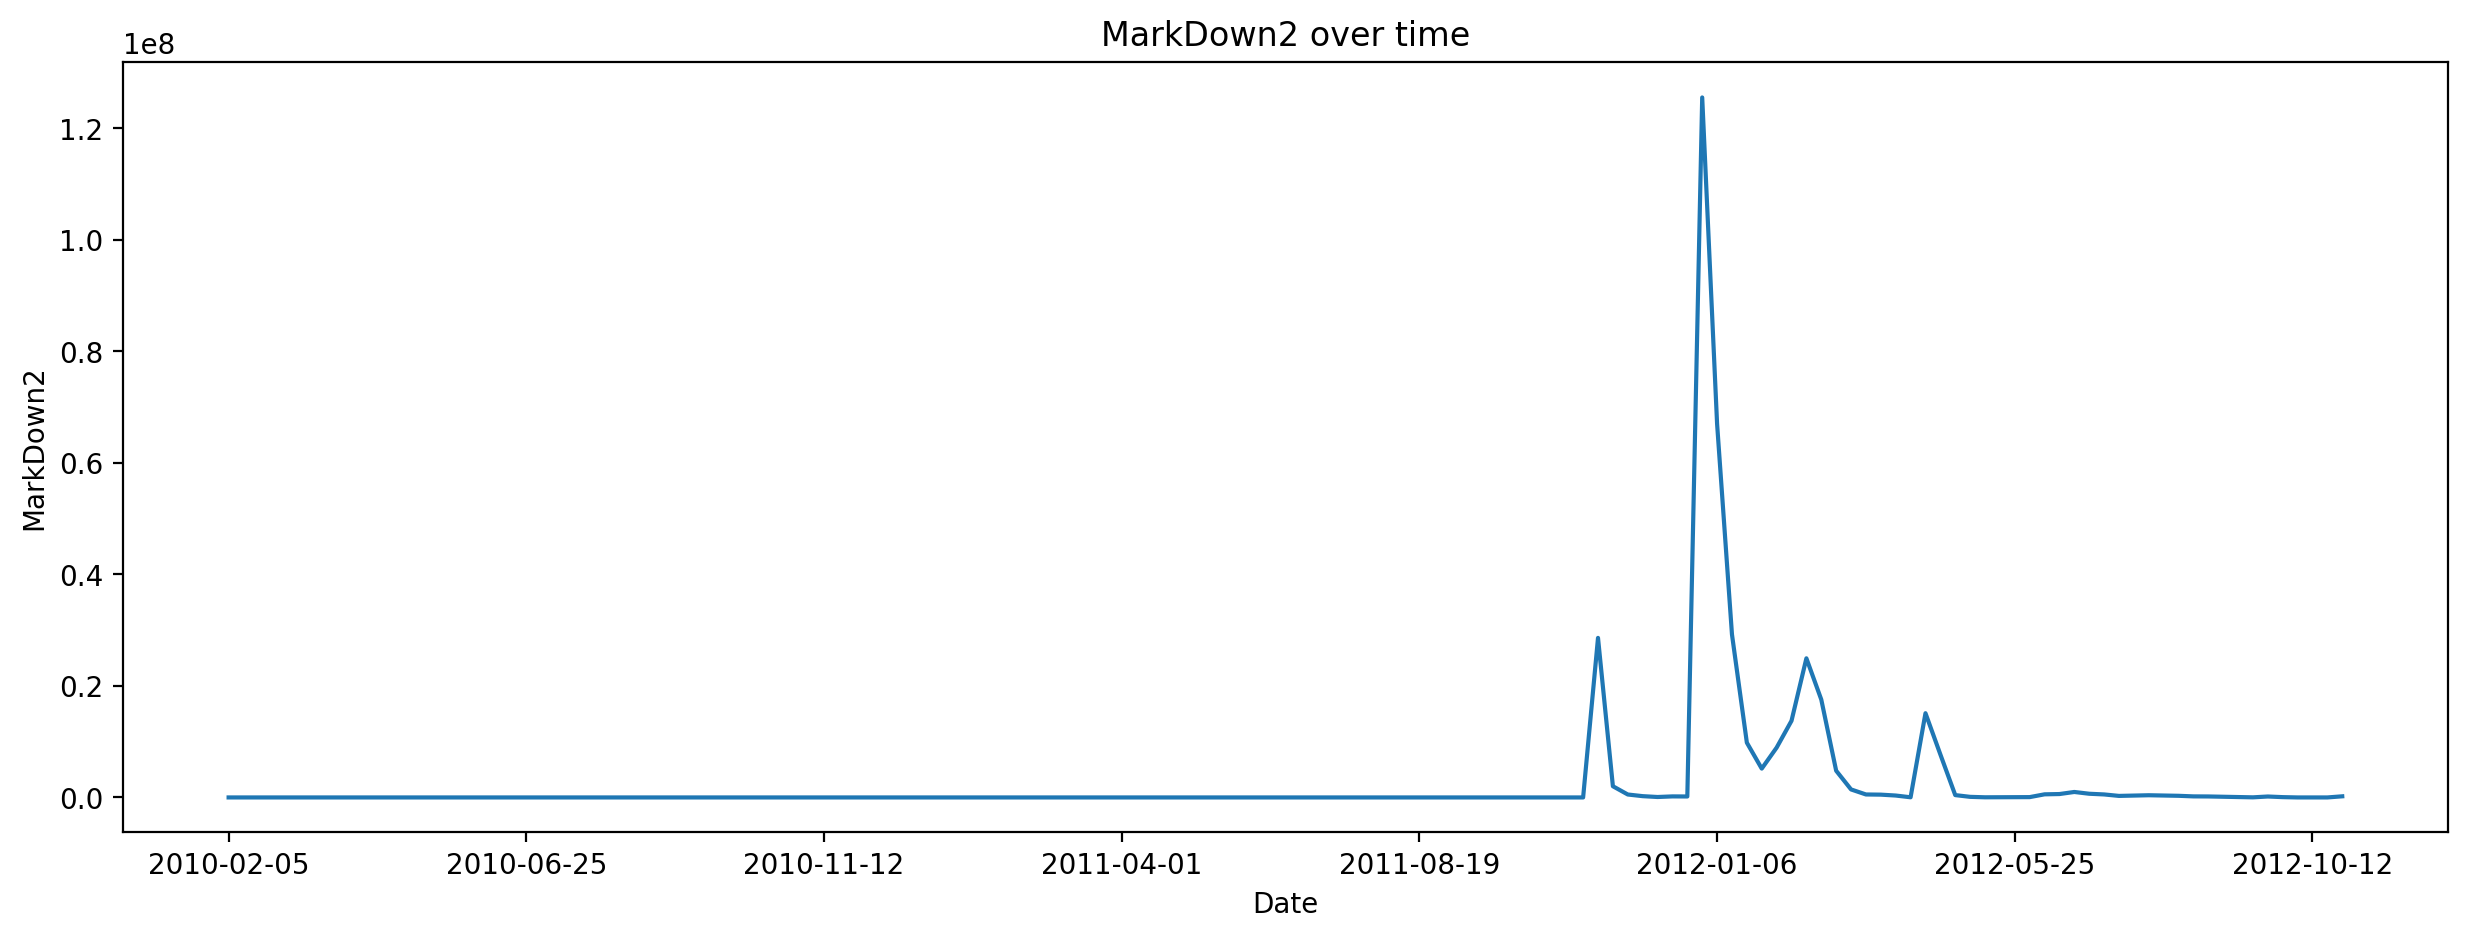

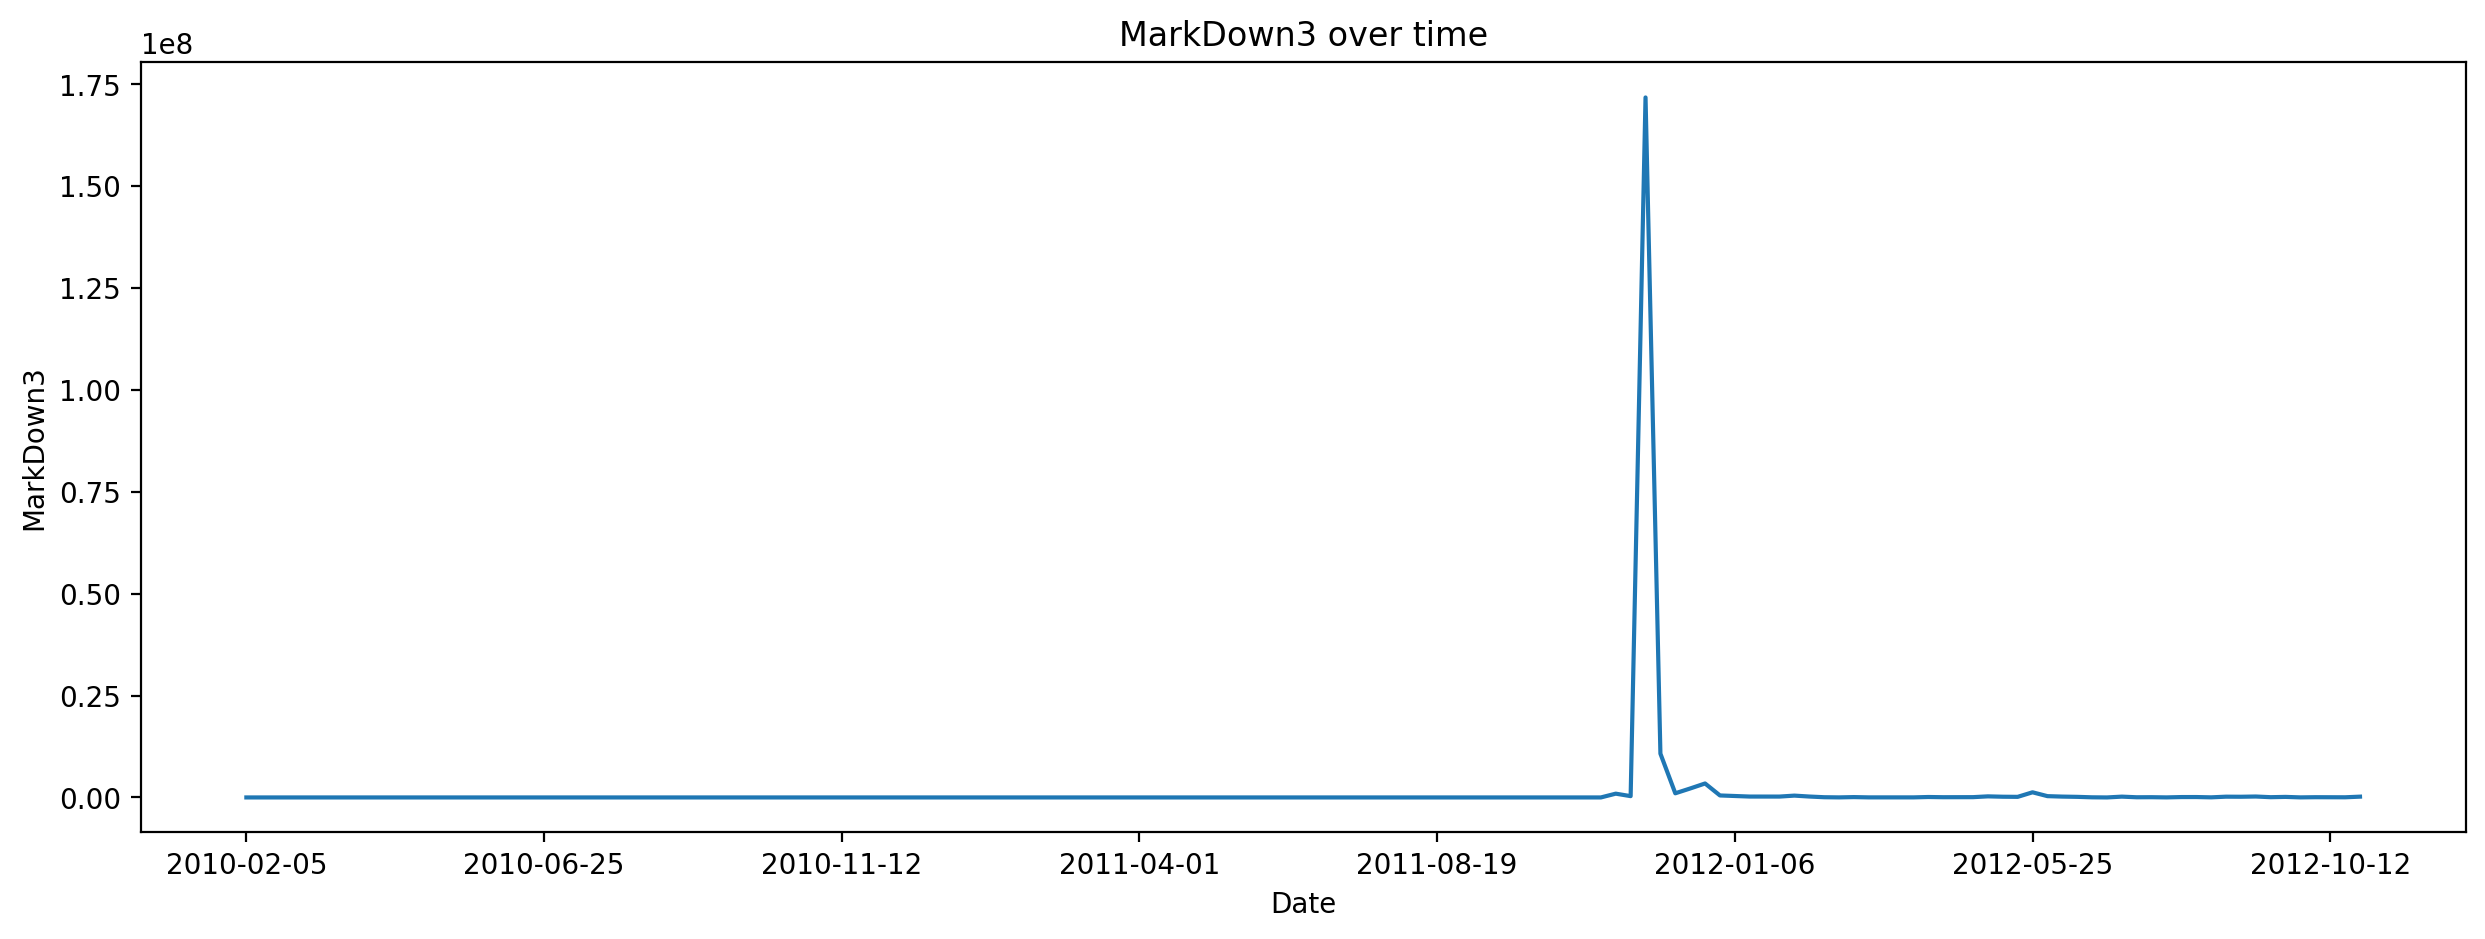

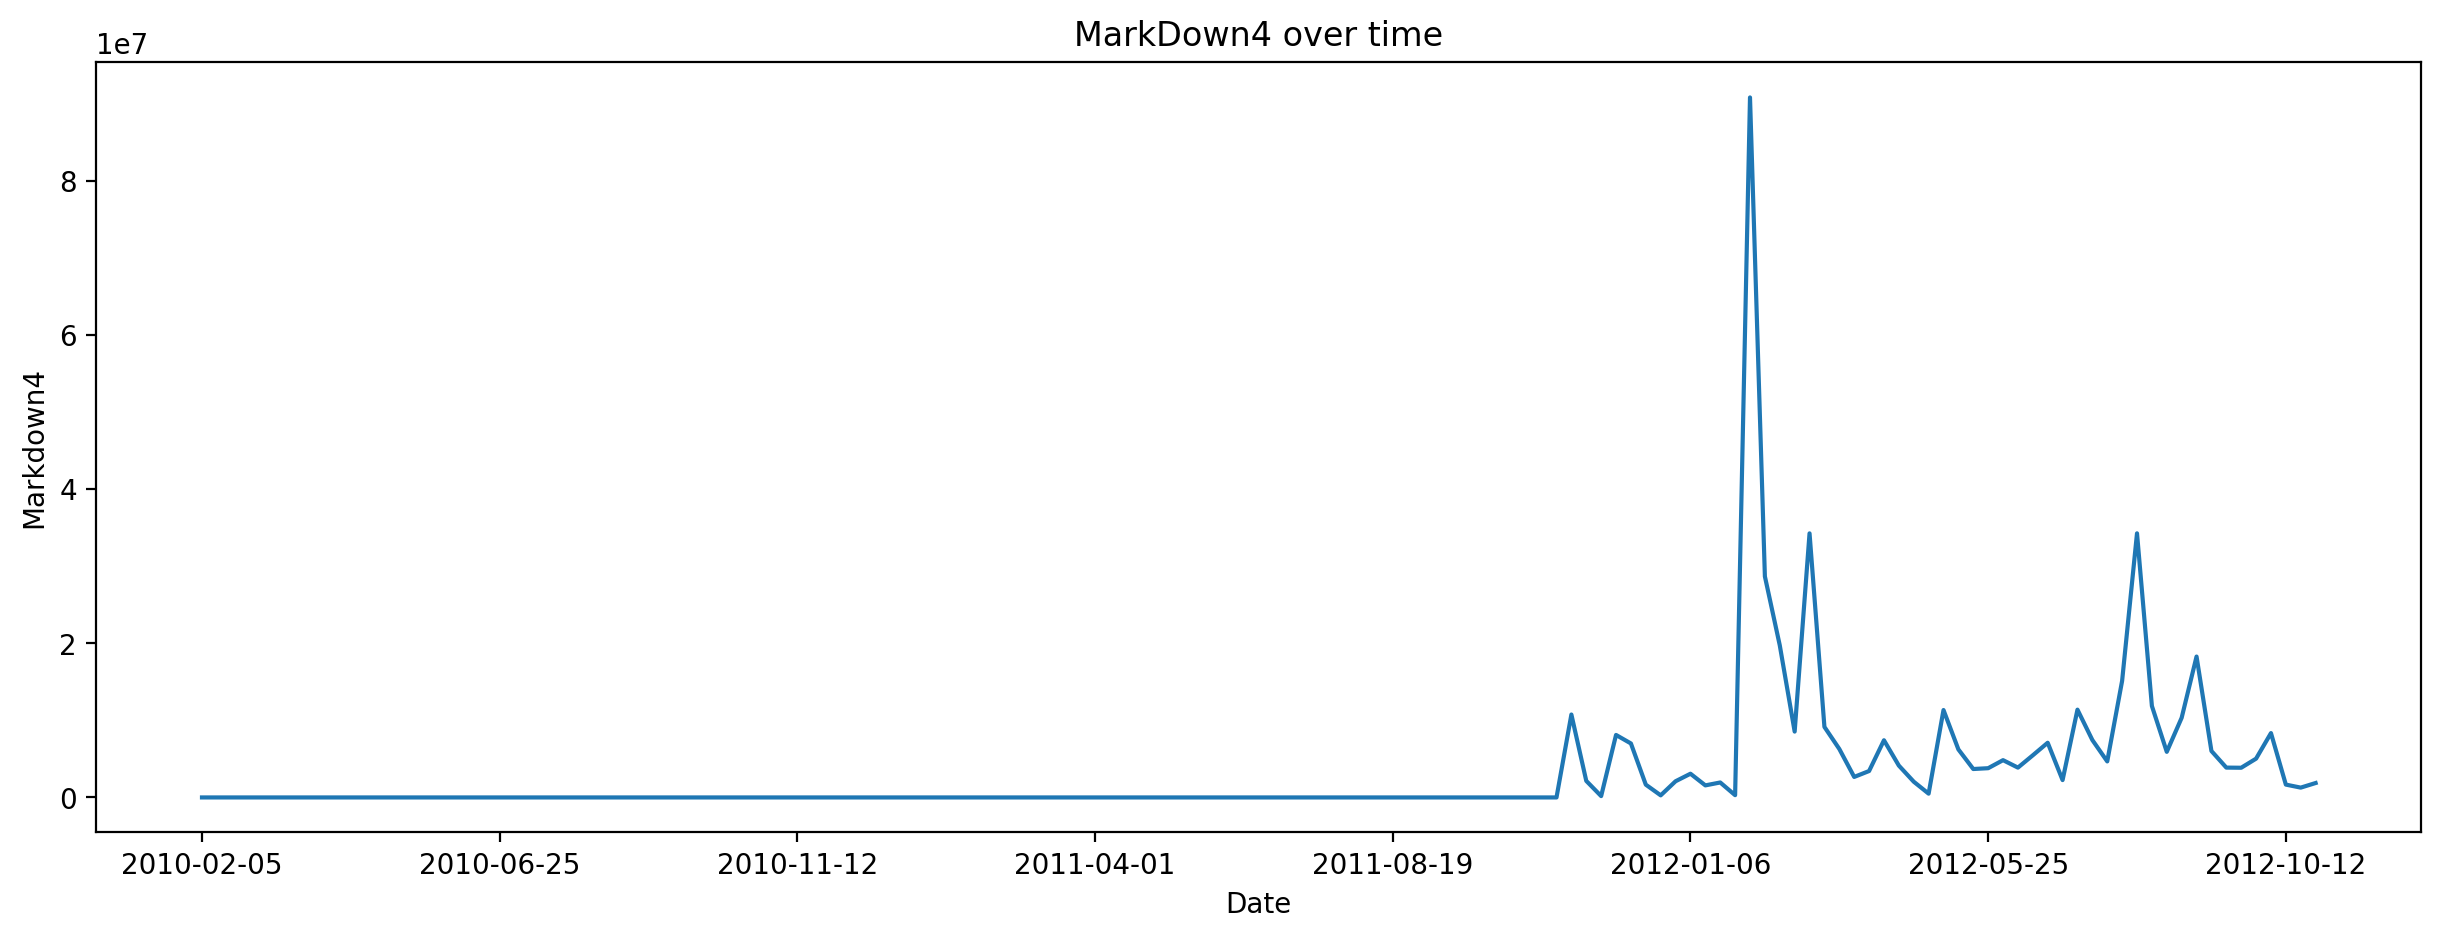

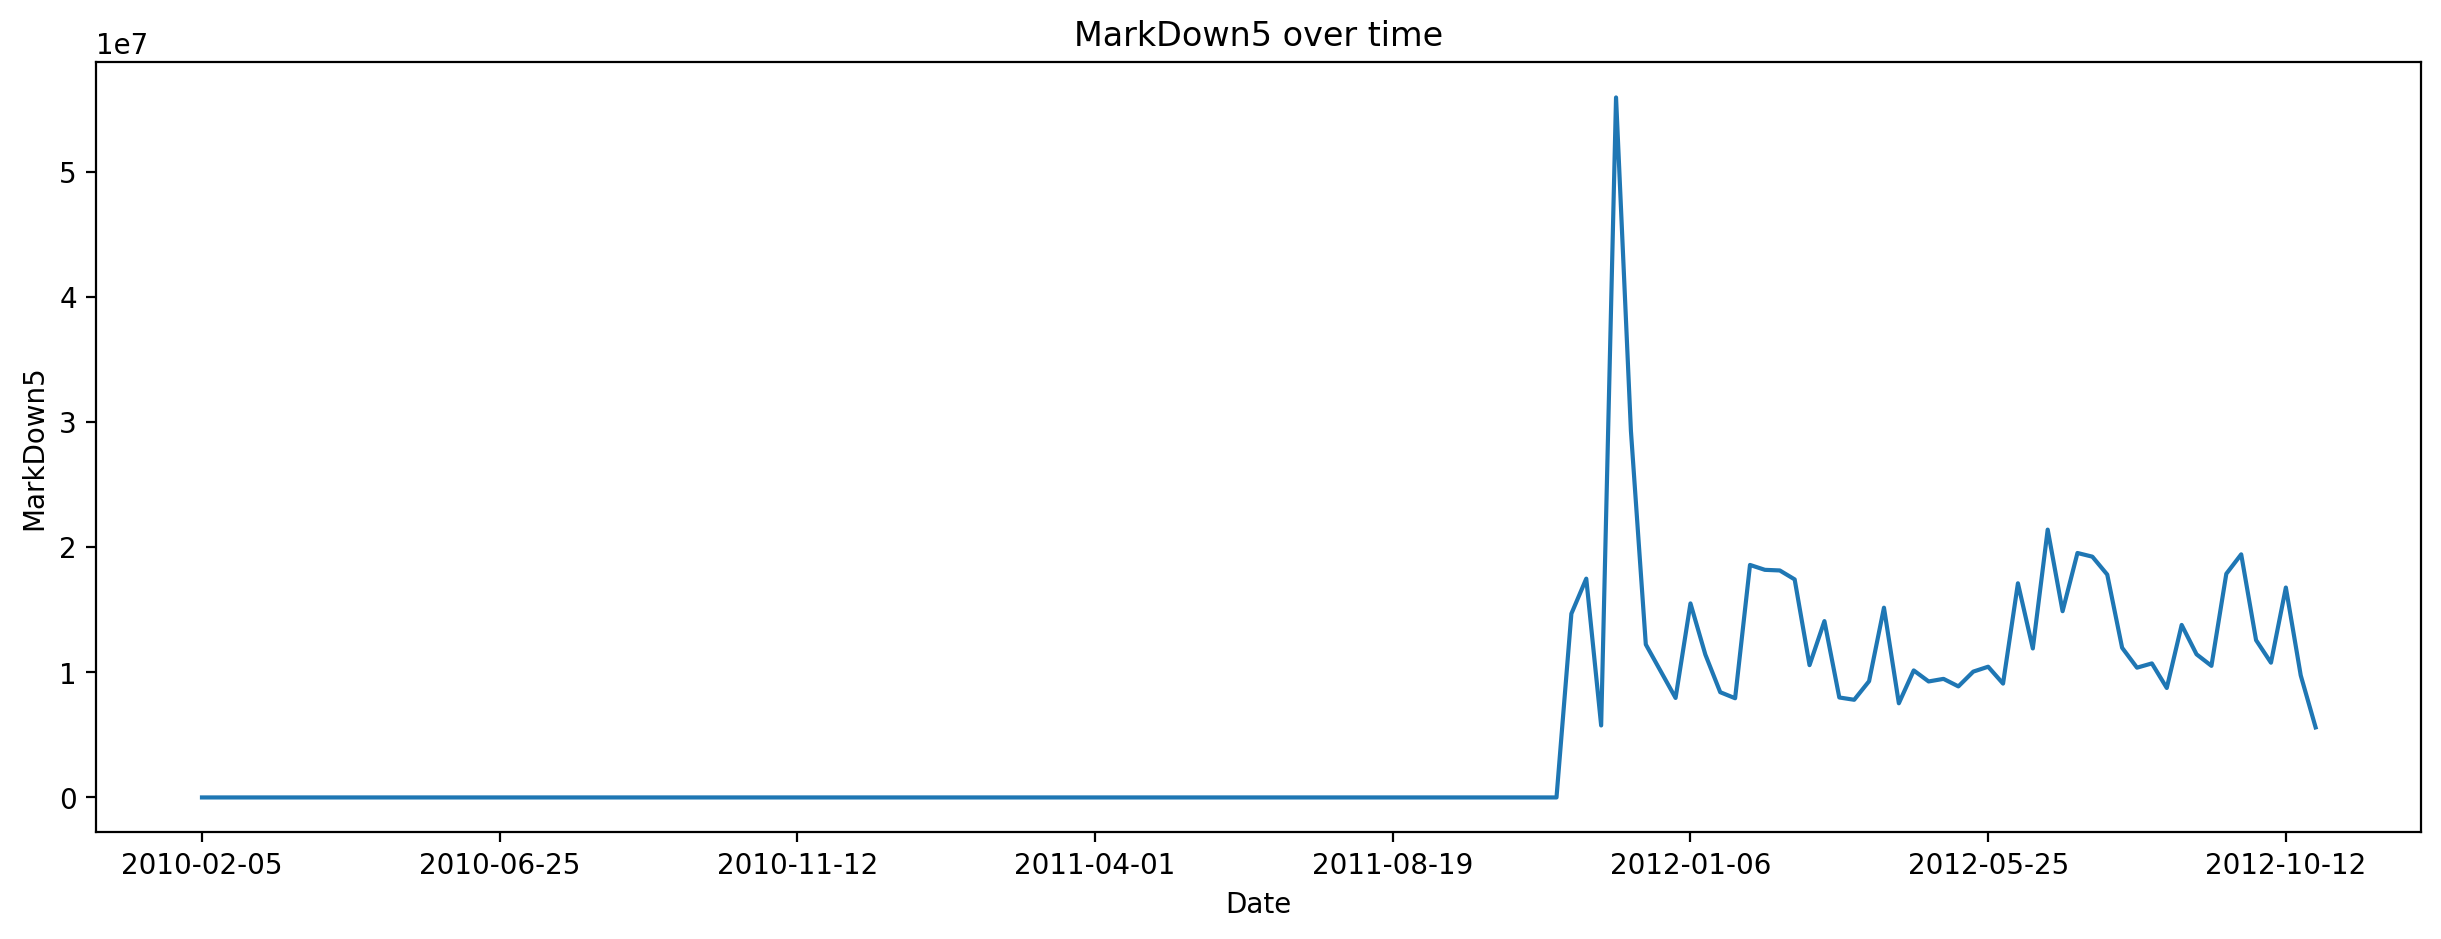

In [13]:
# create Univariate analysis on markdown1, markdown2, markdown3, markdown4, markdown5 column

final.groupby(['Date'])['MarkDown1'].sum().plot(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('MarkDown1')
plt.title('MarkDown1 over time')
plt.show()

final.groupby(['Date'])['MarkDown2'].sum().plot(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('MarkDown2')
plt.title('MarkDown2 over time')
plt.show()

final.groupby(['Date'])['MarkDown3'].sum().plot(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('MarkDown3')
plt.title('MarkDown3 over time')
plt.show()

final.groupby(['Date'])['MarkDown4'].sum().plot(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Markdown4')
plt.title('MarkDown4 over time')
plt.show()

final.groupby(['Date'])['MarkDown5'].sum().plot(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('MarkDown5')
plt.title('MarkDown5 over time')
plt.show()



In [ ]:
# Create Univariate analysis on type column

final.groupby(['Date'])['Type'].sum().plot(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Type')
plt.title('Type over time')
plt.show()


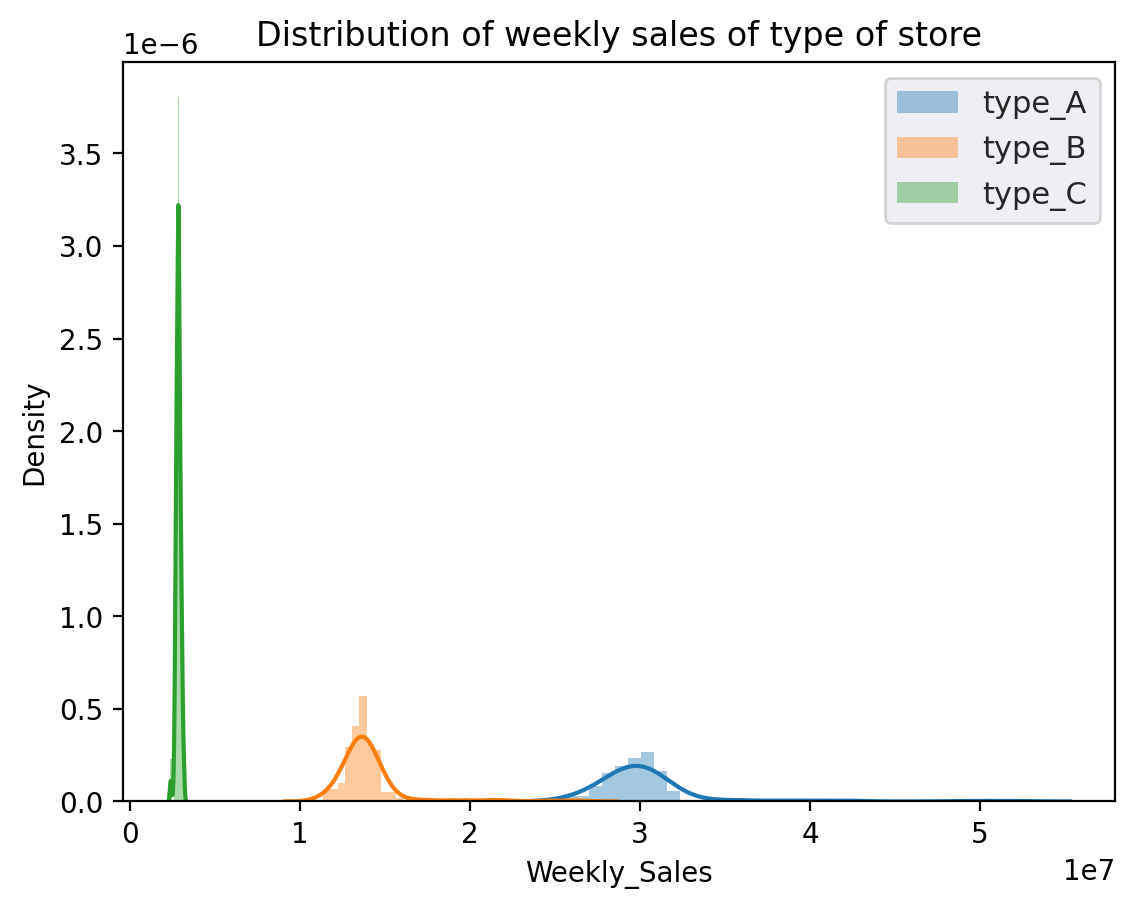

In [21]:
raw = final.groupby(['Type', 'Date', 'IsHoliday'])['Weekly_Sales'].sum().reset_index()
type_A = raw[raw['Type'] == 'A']
type_B = raw[raw['Type'] == 'B']
type_C = raw[raw['Type'] == 'C']
sns.distplot(type_A['Weekly_Sales'], label='type_A')
sns.distplot(type_B['Weekly_Sales'], label='type_B')
sns.distplot(type_C['Weekly_Sales'], label='type_C')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (12.7, 6.27)})
plt.legend()
plt.title('Distribution of weekly sales of type of store')
plt.show()

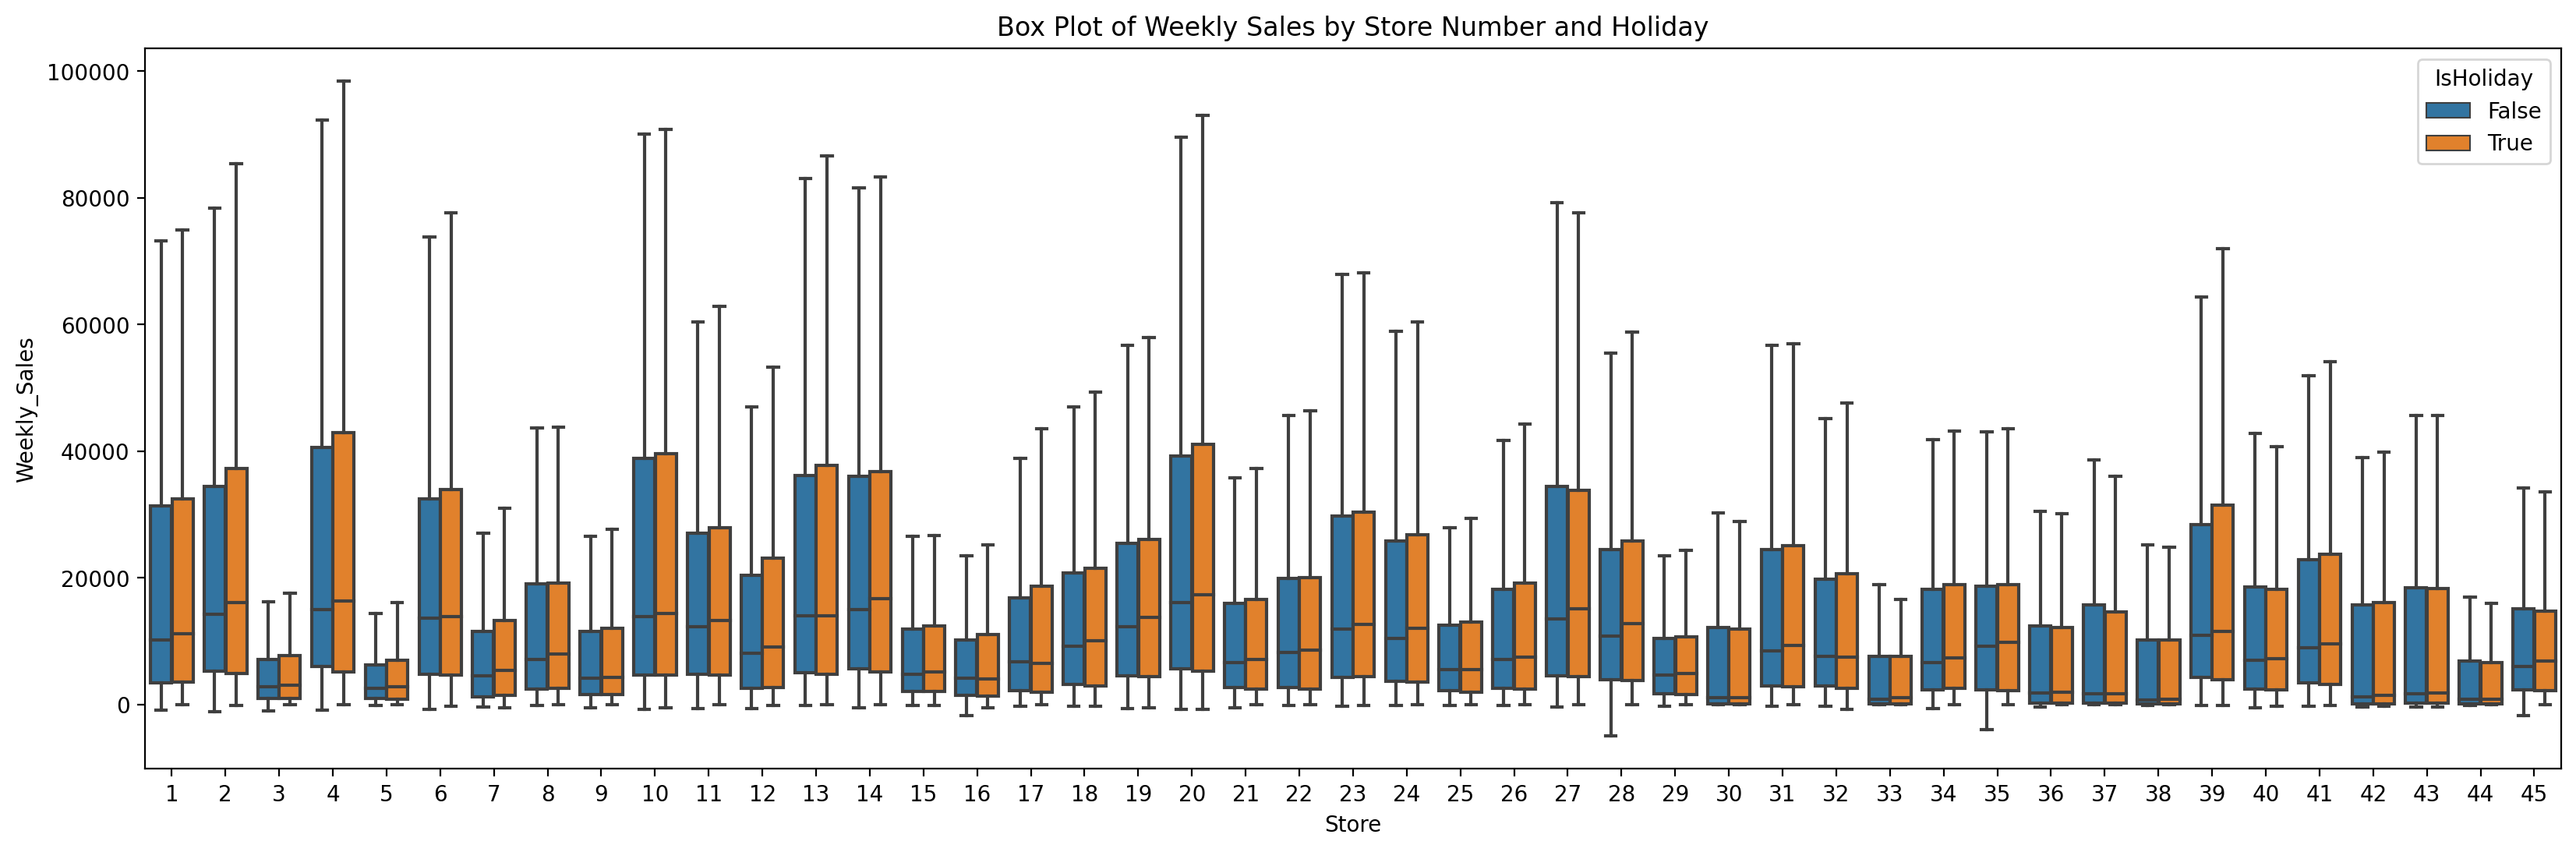

In [15]:
data4 = pd.concat([final['Store'], final['Weekly_Sales'], final['IsHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Weekly Sales by Store Number and Holiday')
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data4, showfliers=False, hue='IsHoliday')

In [16]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [17]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [18]:
final.loc[final.MarkDown1.isnull() ,'MarkDown1']= 0
final.loc[final.MarkDown2.isnull() ,'Markdown2']= 0
final.loc[final.MarkDown3.isnull() ,'Markdown3']= 0
final.loc[final.MarkDown4.isnull() ,'Markdown4']= 0
final.loc[final.MarkDown5.isnull() ,'Markdown5']= 0

In [19]:
final[final.Weekly_Sales<0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Markdown2,Markdown3,Markdown4,Markdown5
188,1,47,2010-02-19,-863.00,False,39.93,2.514,0.00,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,0.0,0.0,0.0,0.0
406,1,47,2010-03-12,-698.00,False,57.79,2.667,0.00,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315,0.0,0.0,0.0,0.0
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,0.00,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315,0.0,0.0,0.0,0.0
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,0.00,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315,0.0,0.0,0.0,0.0
4419,1,47,2011-04-08,-298.00,False,67.84,3.622,0.00,NaN,NaN,NaN,NaN,215.074394,7.682,A,151315,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419999,45,49,2012-05-18,-3.97,False,66.30,3.848,6813.74,NaN,13.86,936.49,2941.55,190.996448,8.567,B,118221,0.0,NaN,NaN,NaN
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221,0.0,NaN,NaN,NaN
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221,NaN,0.0,NaN,NaN
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221,NaN,NaN,NaN,NaN


In [20]:
print('before removoing negative Weekly sales,shape of final dataframe is:',final.shape)
final=final[final.Weekly_Sales>=0]
print('after removing negative weekly sales ,shape of final dataframe is:',final.shape)

before removoing negative Weekly sales,shape of final dataframe is: (421570, 20)
after removing negative weekly sales ,shape of final dataframe is: (420285, 20)


In [26]:
import sklearn.model_selection
final['Date']=pd.to_numeric(pd.to_datetime(final['Date']))
y = final['Weekly_Sales']
X = final.drop(['Weekly_Sales'], axis=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.
# Final shapes.
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape: ', X_test.shape, y_test.shape)

Train shape: (294199, 19) (294199,)
Test shape:  (126086, 19) (126086,)


In [27]:
def WMAE(dataset, real, predicted):

    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [45]:
import datetime
import statsmodels.tsa.api as smt
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error

#For date time functions
from datetime import datetime
from datetime import timedelta
import math
import datetime
# Importing the most popular regression libraries.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, ridge_regression, Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,StackingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Text(0.5, 1.0, 'Weekly sales distribution when grouped by dates ')

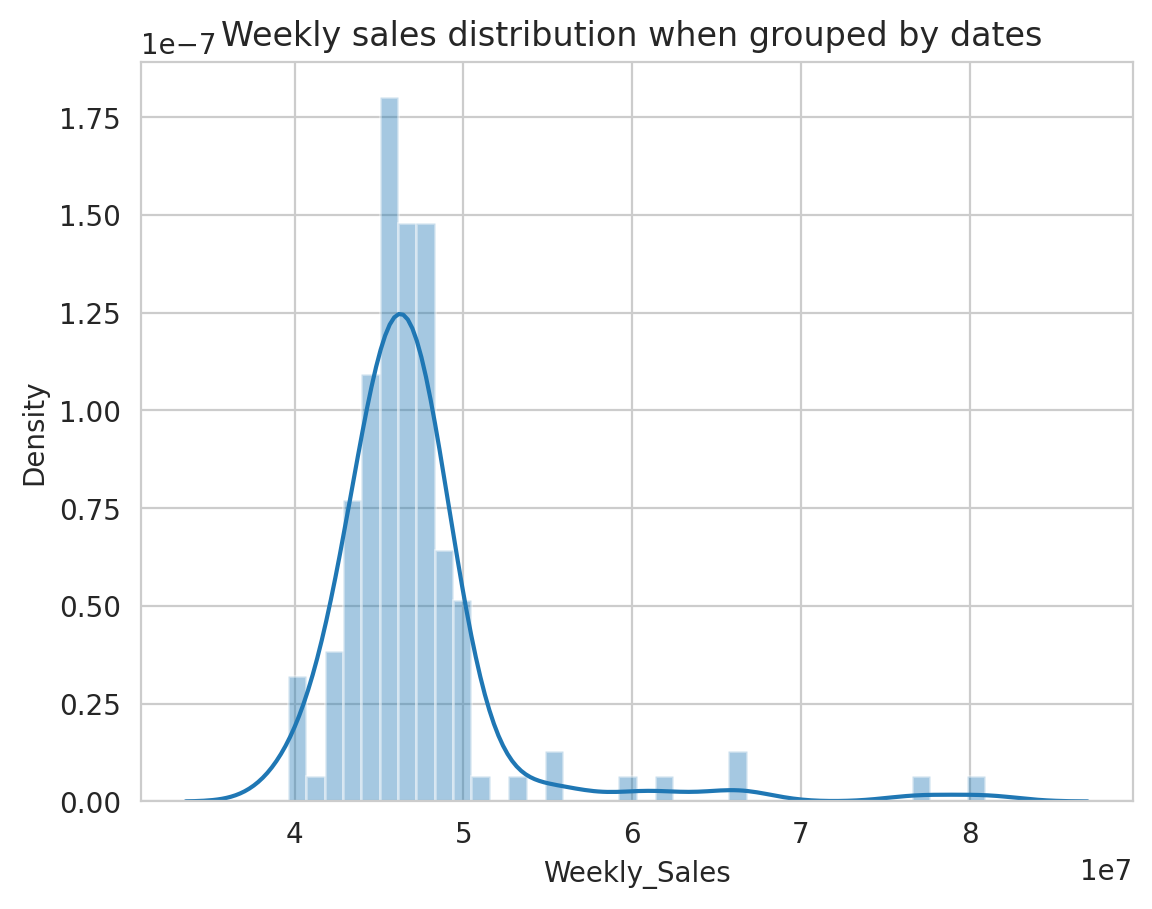

In [44]:
sns.distplot(final.groupby(['Date'])['Weekly_Sales'].sum())
sns.set(rc={'figure.figsize':(15.7,6.27)})
plt.title('Weekly sales distribution when grouped by dates ')

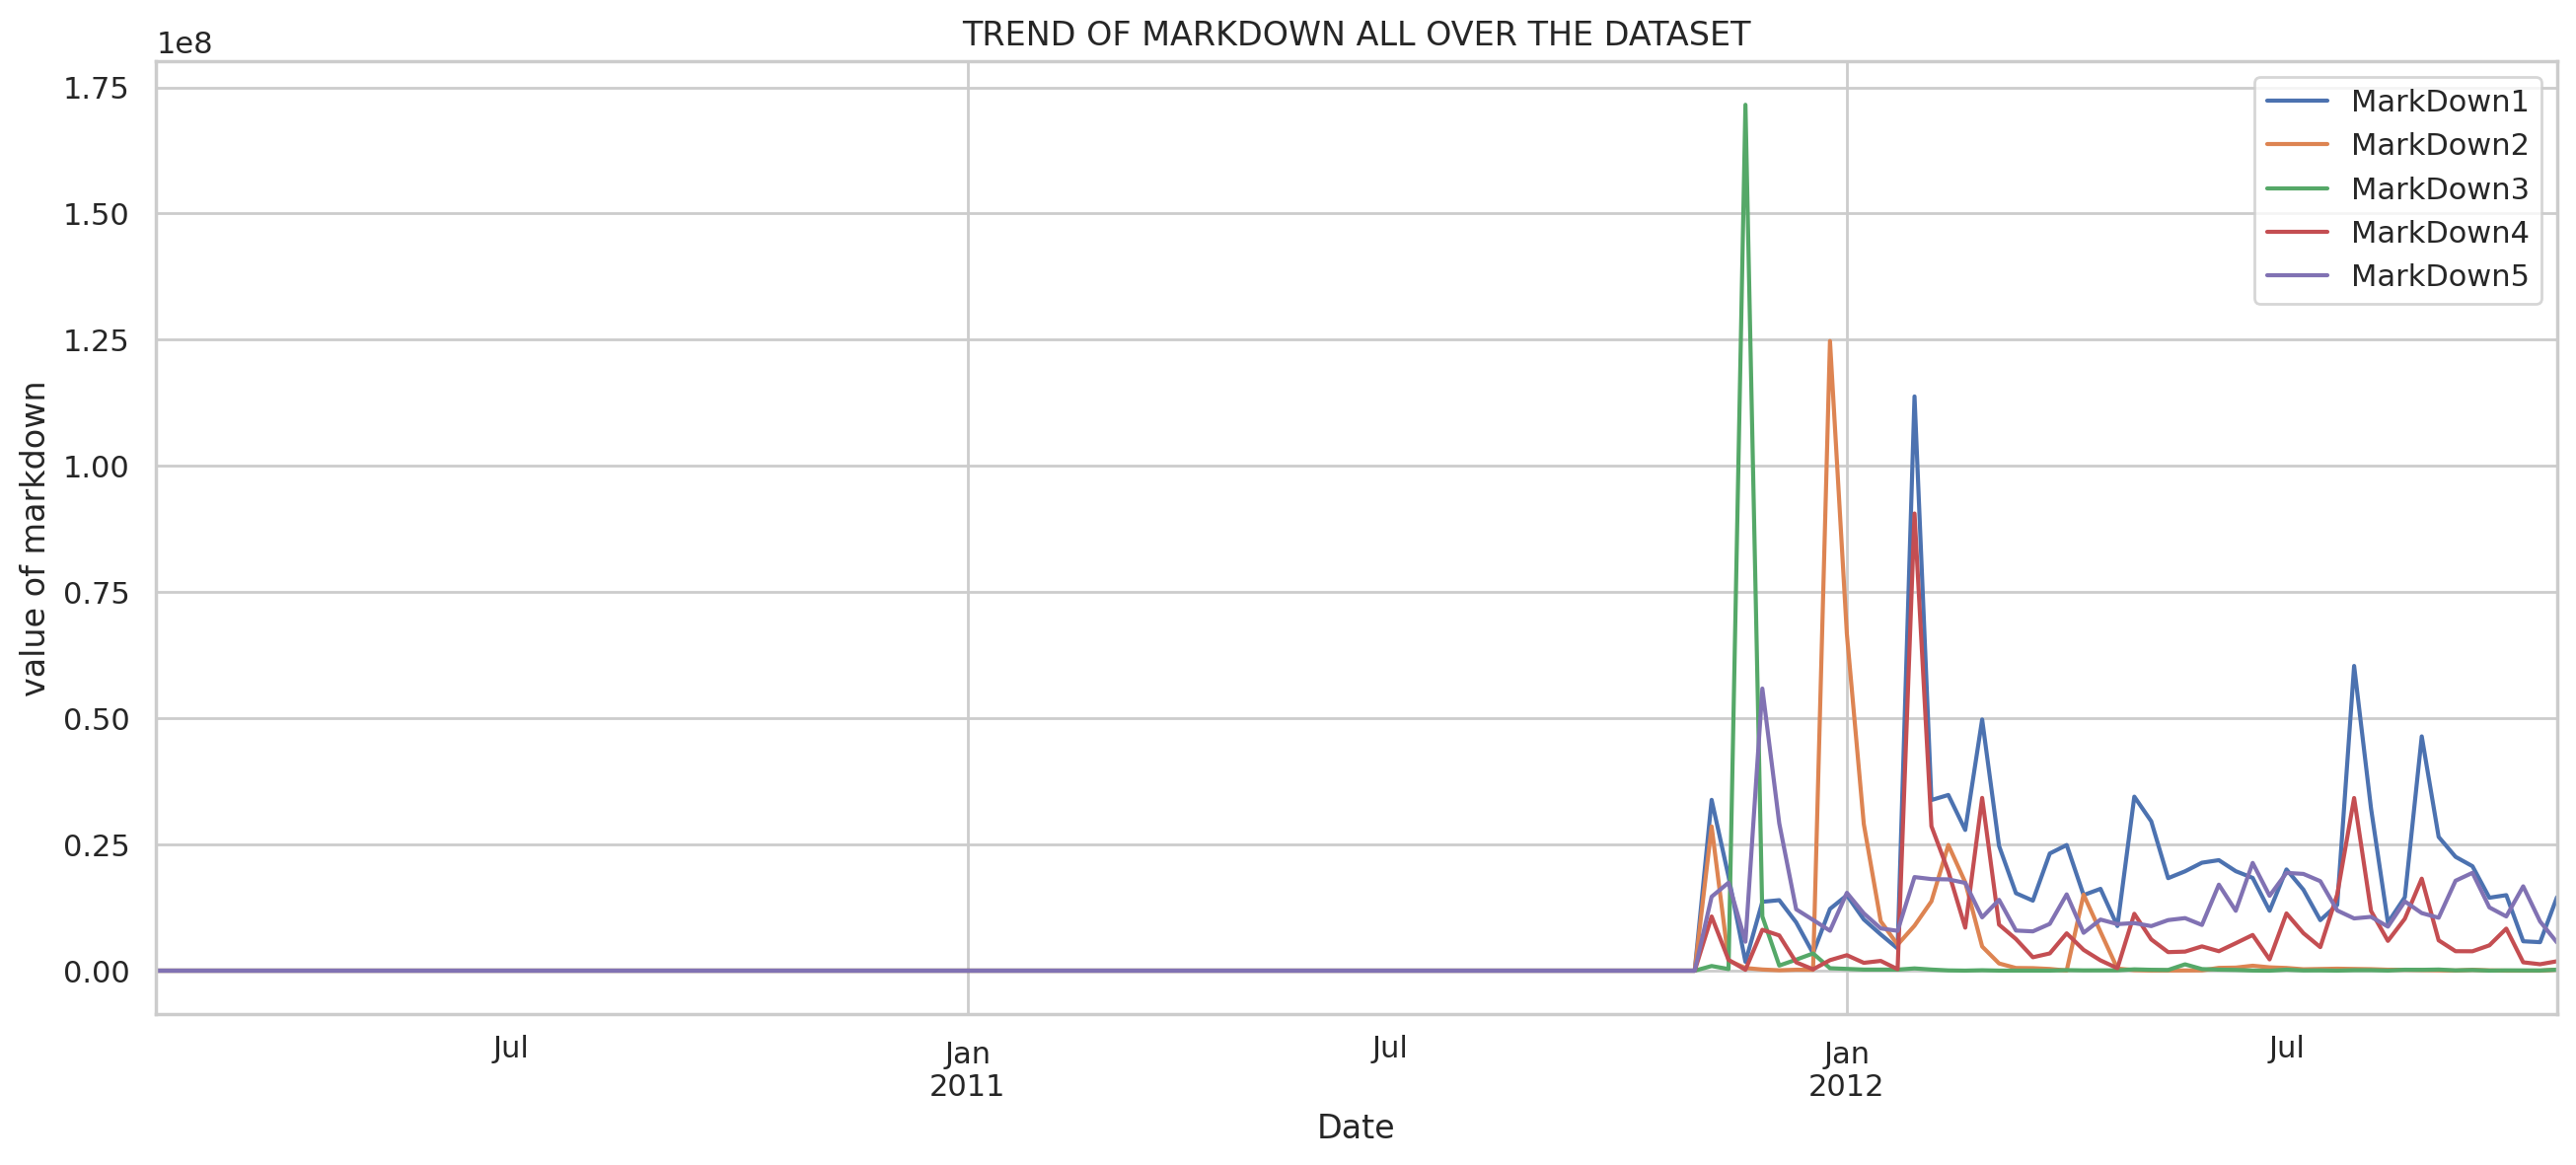

In [46]:
final.groupby(['Date'])['MarkDown1'].sum().plot(label='MarkDown1')
final.groupby(['Date'])['MarkDown2'].sum().plot(label='MarkDown2')
final.groupby(['Date'])['MarkDown3'].sum().plot(label='MarkDown3')
final.groupby(['Date'])['MarkDown4'].sum().plot(label='MarkDown4')
final.groupby(['Date'])['MarkDown5'].sum().plot(label='MarkDown5')
plt.title('TREND OF MARKDOWN ALL OVER THE DATASET')
plt.ylabel('value of markdown')
plt.legend()

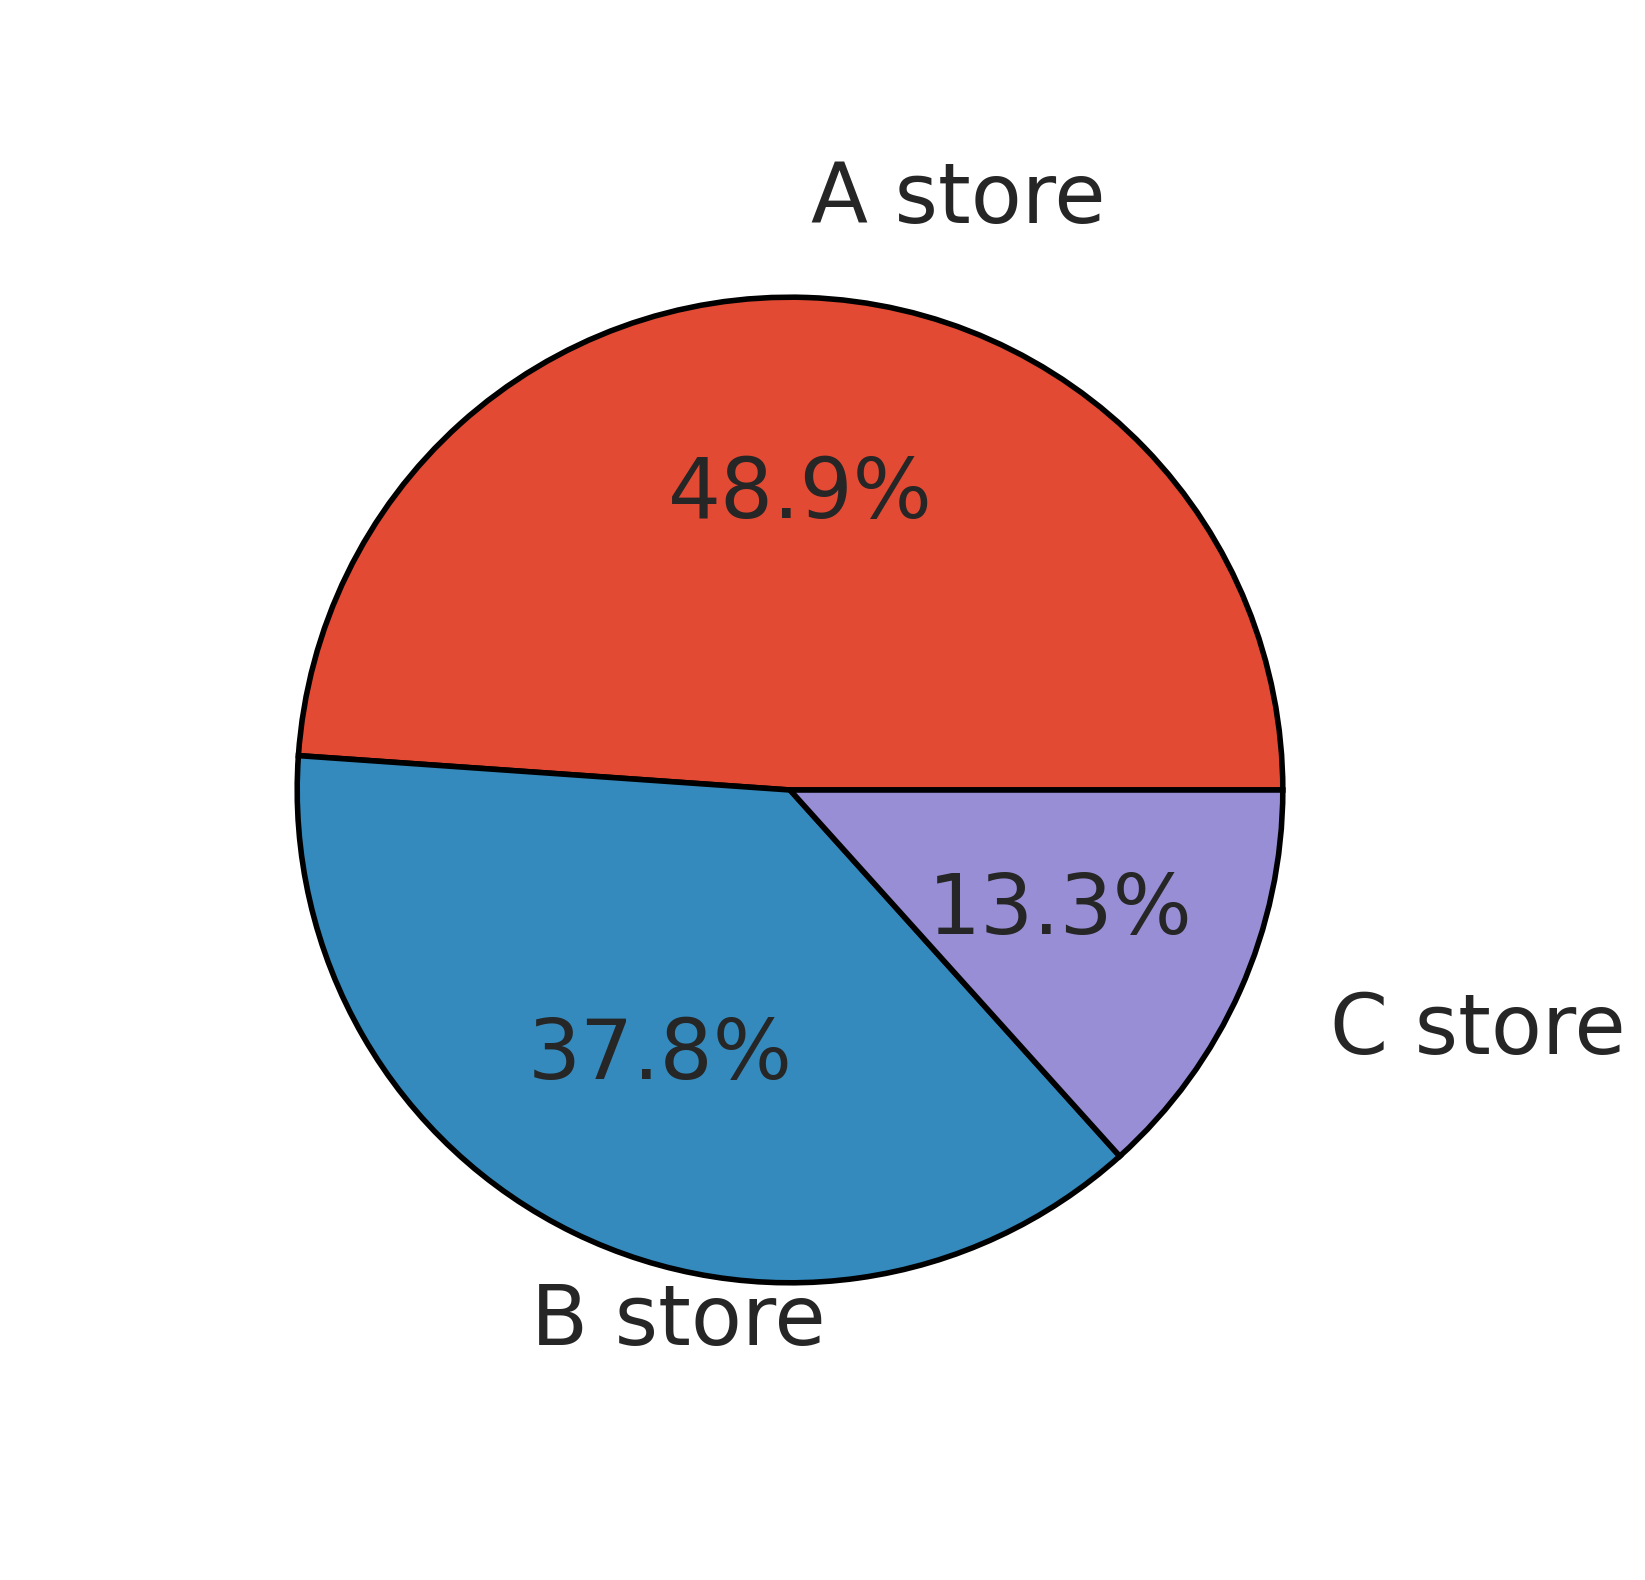

In [47]:
sorted_type = final.groupby('Type')
plt.style.use('ggplot')
labels=['A store','B store','C store']
sizes=sorted_type.describe()['Size'].round(1)
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100] # convert to the proportion
fig, axes = plt.subplots(1,1, figsize=(10,10))
wprops={'edgecolor':'black',
      'linewidth':2}
tprops = {'fontsize':30}
axes.pie(sizes,
        labels=labels,
        explode=(0.0,0,0),
        autopct='%1.1f%%',
        pctdistance=0.6,
        labeldistance=1.2,
        wedgeprops=wprops,
        textprops=tprops,
        radius=0.8,
        center=(0.5,0.5))
plt.show()

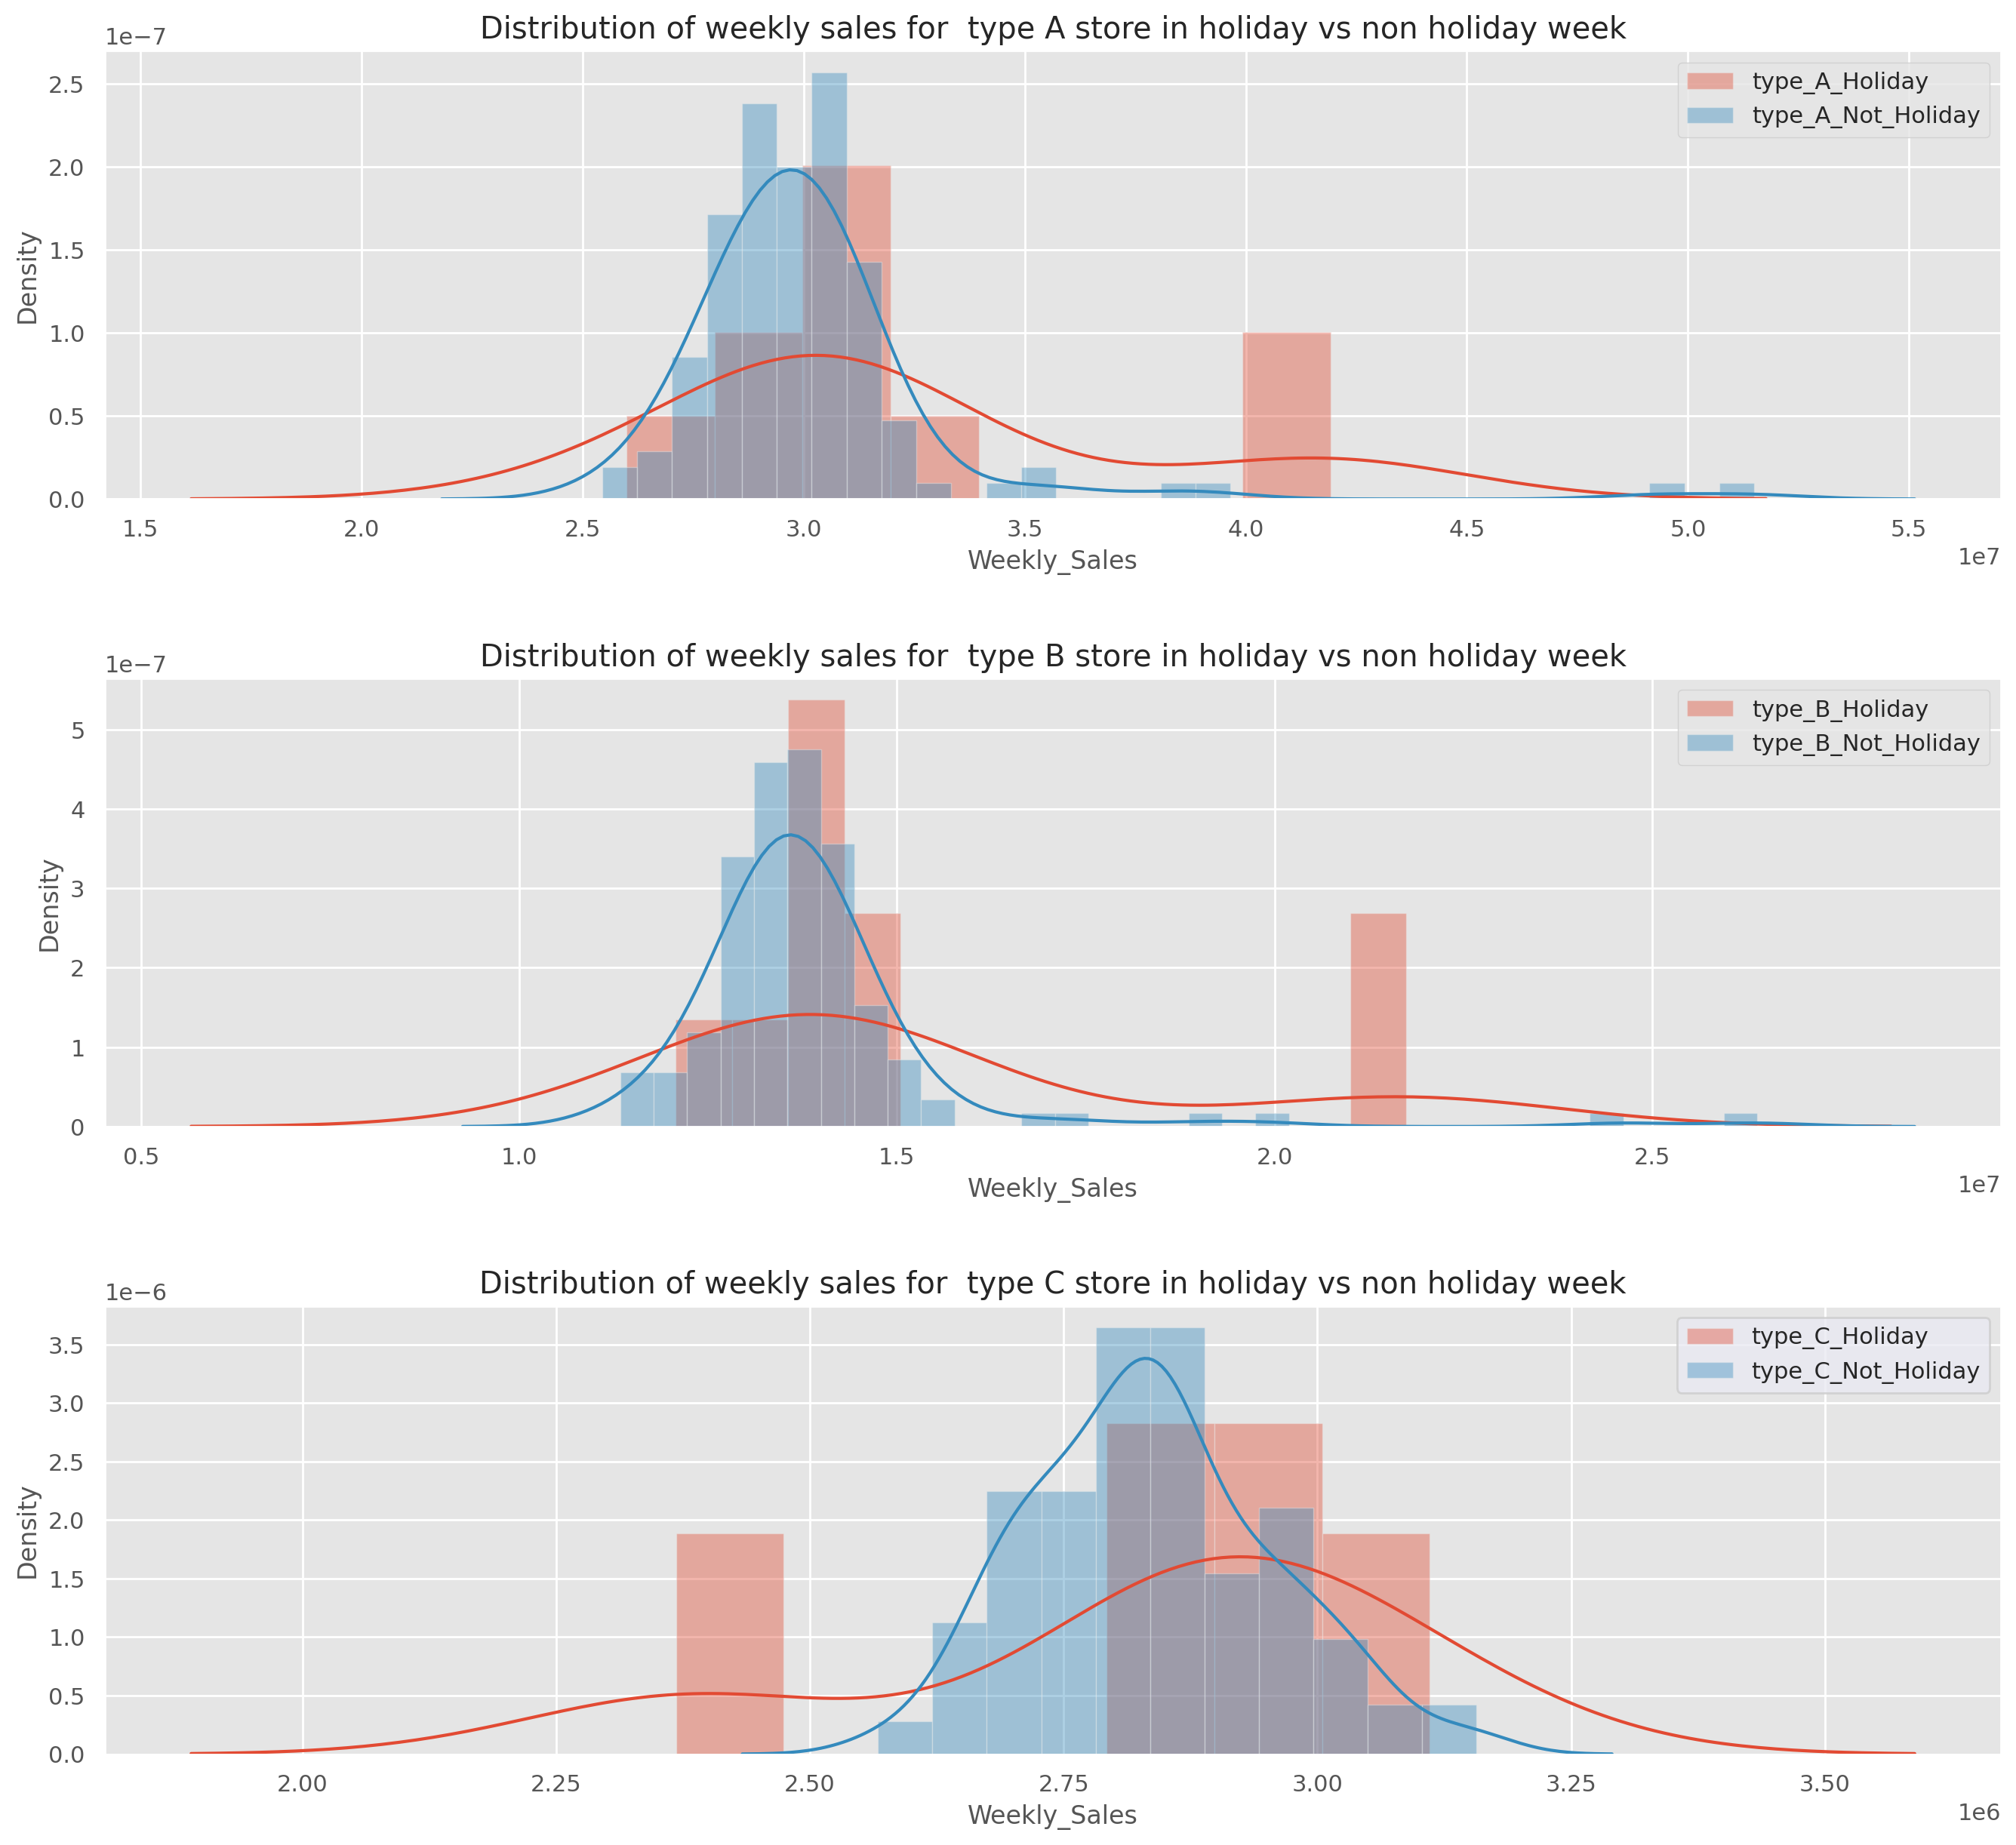

In [48]:
raw=final.groupby(['Type','Date','IsHoliday'])['Weekly_Sales'].sum().reset_index()
plt.title('Distribution of weekly sales of type of store')
plt.figure(1)
plt.subplot(311)
plt.title('Distribution of weekly sales for  type A store in holiday vs non holiday week')
type_A_H=raw[(raw['Type']=='A') & (raw['IsHoliday']==True)]
type_A_NH=raw[(raw['Type']=='A') & (raw['IsHoliday']==False)]
sns.distplot(type_A_H['Weekly_Sales'],label='type_A_Holiday')
sns.distplot(type_A_NH['Weekly_Sales'],label='type_A_Not_Holiday')
plt.legend()
plt.subplot(312)
plt.title('Distribution of weekly sales for  type B store in holiday vs non holiday week')
type_B_H=raw[(raw['Type']=='B') & (raw['IsHoliday']==True)]
type_B_NH=raw[(raw['Type']=='B') & (raw['IsHoliday']==False)]
sns.distplot(type_B_H['Weekly_Sales'],label='type_B_Holiday')
sns.distplot(type_B_NH['Weekly_Sales'],label='type_B_Not_Holiday')
plt.legend()
plt.subplot(313)
plt.title('Distribution of weekly sales for  type C store in holiday vs non holiday week')
type_C_H=raw[(raw['Type']=='C') & (raw['IsHoliday']==True)]
type_C_NH=raw[(raw['Type']=='C') & (raw['IsHoliday']==False)]
sns.distplot(type_C_H['Weekly_Sales'],label='type_C_Holiday')
sns.distplot(type_C_NH['Weekly_Sales'],label='type_C_Not_Holiday')
sns.set(rc={'figure.figsize':(12.7,6.27)})
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.4,
                    hspace=0.4)
plt.legend()
plt.show()

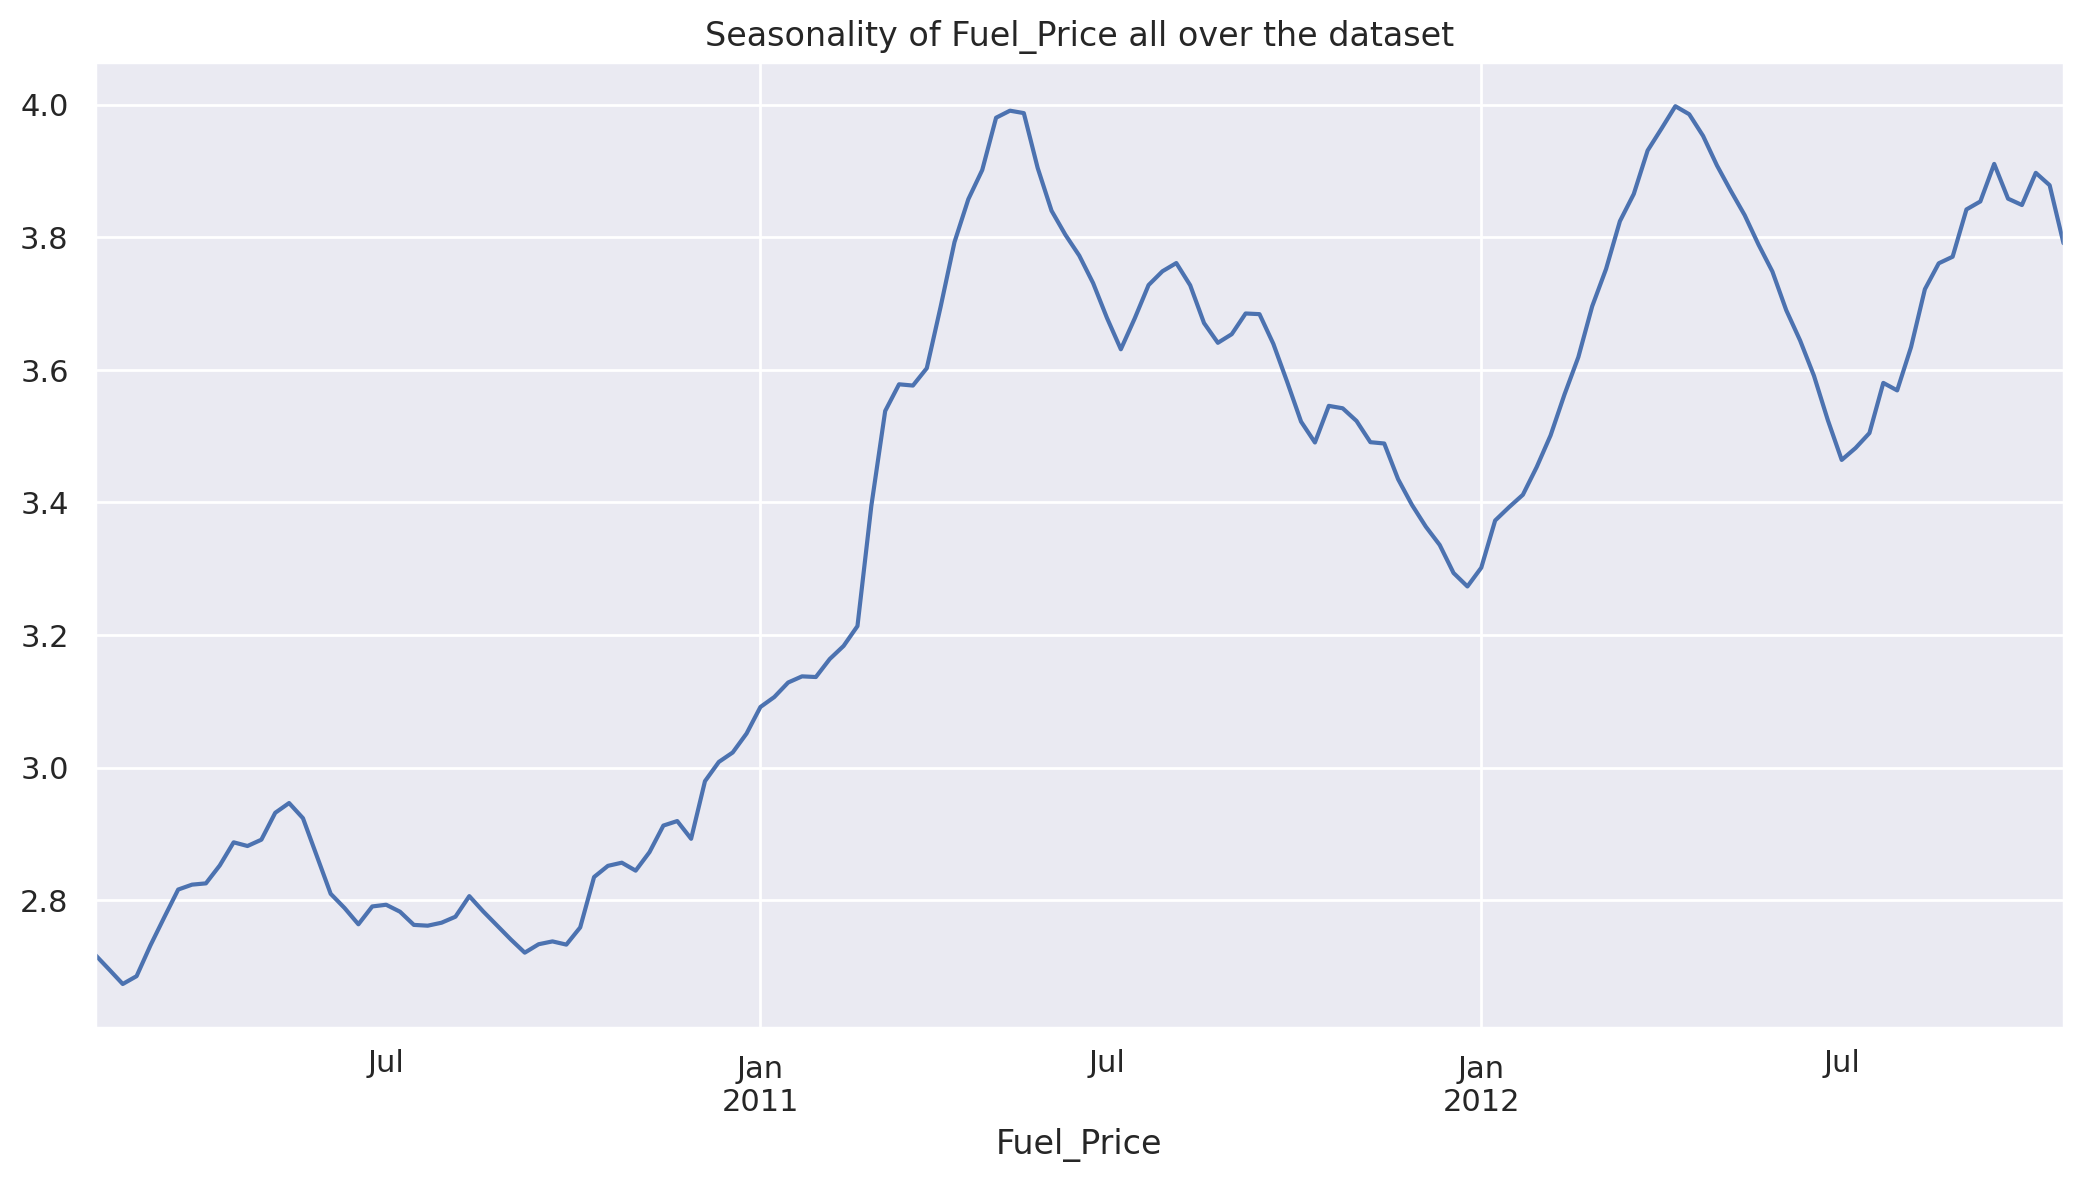

In [49]:
#Distribution of Fuel_Price all over the dataset
final[['Date','Fuel_Price']].groupby(['Date'])['Fuel_Price'].agg('mean').plot(color='b')
plt.title('Seasonality of Fuel_Price all over the dataset')
plt.xlabel('Fuel_Price')
sns.set(rc={'figure.figsize':(18.7,6.27)})

Text(0, 0.5, 'weekly sales')

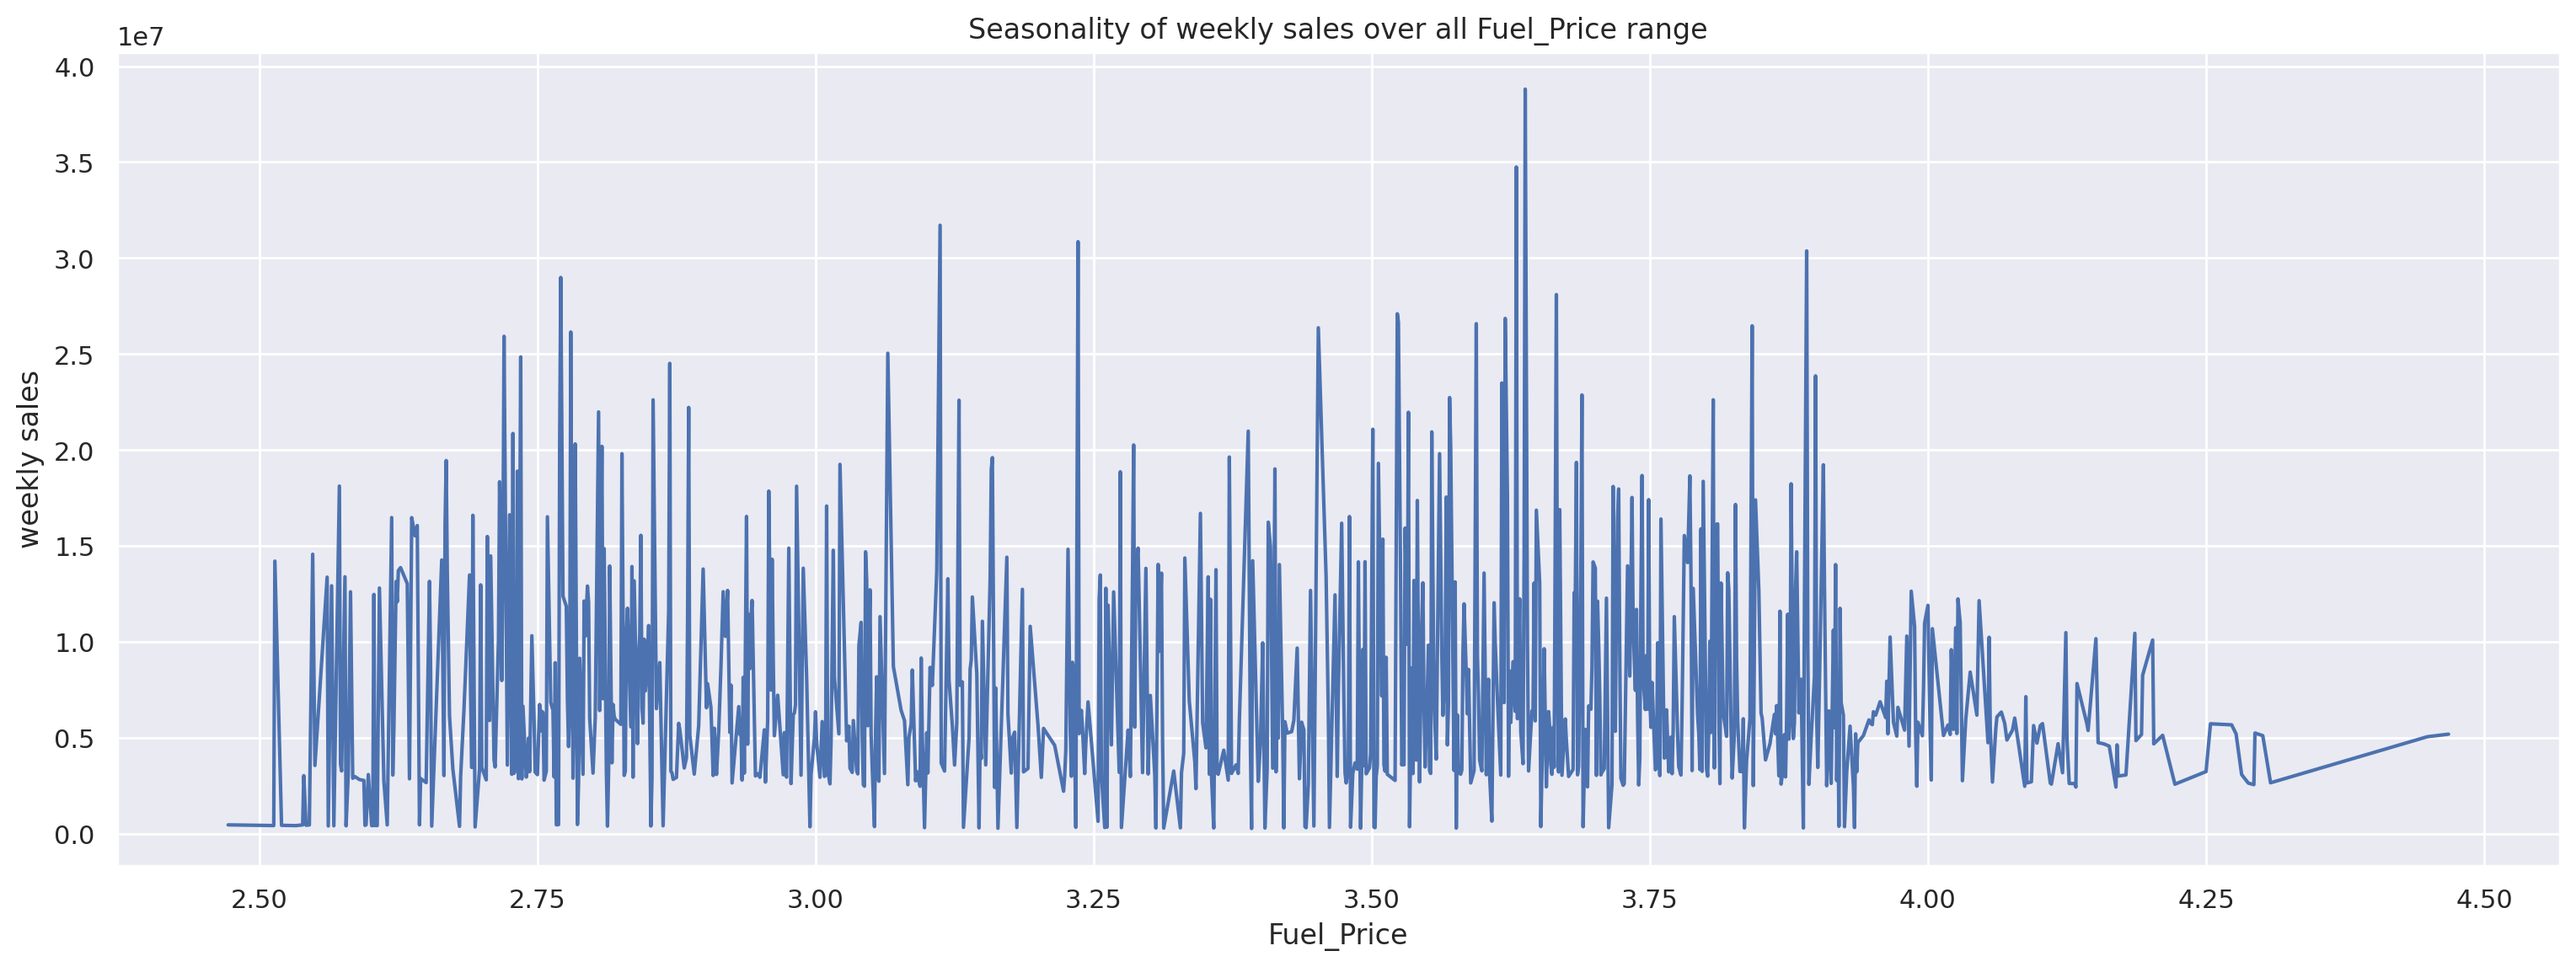

In [51]:
final[['Fuel_Price','Weekly_Sales']].groupby(['Fuel_Price'])['Weekly_Sales'].sum().plot()
plt.title('Seasonality of weekly sales over all Fuel_Price range')
plt.ylabel('weekly sales')

In [43]:
final['Date'] = pd.to_datetime(final['Date'])
final['Year'] = final['Date'].dt.year
final['Month']= final['Date'].dt.month
final['Week'] = final['Date'].dt.week
final['Day']  = final['Date'].dt.day